In [1]:
# Library import
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

delta=dt.timedelta(days=1)

In [2]:
# Get main path and other folders
s_mainpath=Path.cwd()
print(s_mainpath)
s_parentpath=s_mainpath.parent.parent.parent
print(s_parentpath)
# folderpath=s_parentpath.joinpath(r'DatosXM\Despacho\\')

# Ruta General
sRutaDesp=r'C:\Información XM\\Publico\\'

sRutaPrint=s_mainpath.joinpath('Print')

c:\Alejo\Eje de Planeación\Análisis Eléctrico\ScriptsPython
c:\Alejo


In [24]:
# Rango de análisis

s_FechaIni='2024-01-01'
s_FechaFin='2025-03-11'

#Camniar a formato fecha
d_FechaIni=dt.datetime.strptime(s_FechaIni,'%Y-%m-%d')
d_FechaFin=dt.datetime.strptime(s_FechaFin,'%Y-%m-%d')


In [25]:
# Inicializar fecha
d_Fecha=d_FechaIni

# Encabezados 
l_colZon=['NombreZona','Tipo'] # Archivo dSegDes
l_colDem=['NombreSub'] # Archivo de dDem

for i in range(1,25): 
    l_colZon.append(i)
    l_colDem.append(i)

filetypes=['dSEGDES','dDEM','dINT','dLIM'] # Lista con los archivos a analizar

l_SubCar2=['ATLANTIC','BOLIVAR','GCM'] # Lista con las subareas

df_Zon=pd.DataFrame()
df_Dem=pd.DataFrame()
df_Int=pd.DataFrame()
df_Limp=pd.DataFrame()
df_DemSubCar2=pd.DataFrame()

while d_Fecha<=d_FechaFin:

    ano=d_Fecha.year
    mes=d_Fecha.month
    dia=d_Fecha.day

    for filetype in filetypes:

        if filetype=='dSEGDES':
            folderpath=Path(sRutaDesp + 'Despacho\\')
            file=filetype + "{:02d}".format(mes) + "{:02d}".format(dia) + '.txt'
            s_filepath=folderpath.joinpath(str(ano) + '-' + "{:02d}".format(mes),file)
            df_Aux = pd.read_csv(s_filepath, sep=',',names=l_colZon,encoding="ISO-8859-1")
            df_Aux['Fecha']=d_Fecha
            df_Zon=pd.concat([df_Zon,df_Aux])

        elif filetype=='dDEM':
            folderpath=Path(sRutaDesp + 'Despacho\\')
            file=filetype + "{:02d}".format(mes) + "{:02d}".format(dia) + '.txt'
            s_filepath=folderpath.joinpath(str(ano) + '-' + "{:02d}".format(mes),file)
            df_Aux = pd.read_csv(s_filepath, sep=',',names=l_colDem,encoding="ISO-8859-1")
            df_Aux['Fecha']=d_Fecha
            df_Aux2=df_Aux[df_Aux['NombreSub'].isin(l_SubCar2)]
            df_DemSubCar2=pd.concat([df_DemSubCar2,df_Aux2])
            df_Dem=pd.concat([df_Dem,df_Aux])

        elif filetype=='dINT':
            folderpath=Path(sRutaDesp + 'Despacho\\')
            file=filetype + "{:02d}".format(mes) + "{:02d}".format(dia) + '.txt'
            s_filepath=folderpath.joinpath(str(ano) + '-' + "{:02d}".format(mes),file)
            df_Aux = pd.read_csv(s_filepath, sep=',',names=l_colDem,encoding="ISO-8859-1")
            df_Aux['Fecha']=d_Fecha
            df_Aux2=df_Aux[df_Aux['NombreSub'].isin(['CARIBE2'])]
            df_Int=pd.concat([df_Int,df_Aux2])

        elif filetype=='dLIM':
            folderpath=Path(sRutaDesp + 'Despacho\\')
            file=filetype + "{:02d}".format(mes) + "{:02d}".format(dia) + '.txt'
            s_filepath=folderpath.joinpath(str(ano) + '-' + "{:02d}".format(mes),file)
            df_Aux = pd.read_csv(s_filepath, sep=',',names=l_colDem,encoding="ISO-8859-1")
            df_Aux['Fecha']=d_Fecha
            df_Aux2=df_Aux[df_Aux['NombreSub'].isin(['CARIBE2'])]
            df_Limp=pd.concat([df_Limp,df_Aux2])

    d_Fecha=d_Fecha+delta

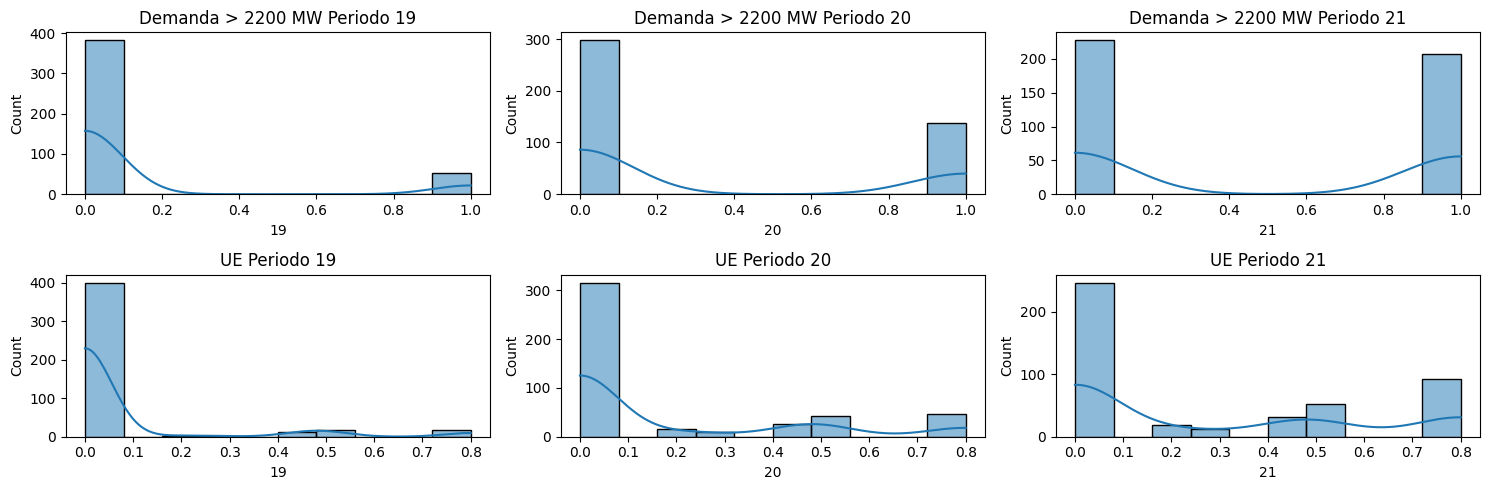

In [59]:
df_punta2=df_DemSubCar2.groupby(['Fecha'])[['NombreSub',19,20,21]].sum()
df_punta2['NombreSub'] = 'Caribe2'
df_punta2 = df_punta2.round({19: 2, 20: 2, 21: 2})
df_punta2[[19, 20, 21]] = df_punta2[[19, 20, 21]].applymap(lambda x: 1 if x > 2200 else 0)

df_Bol=df_Zon[df_Zon['NombreZona']=='ZS_BOLIVAR'][['NombreZona',19,20,21]]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

# First row: df_punta2
sns.histplot(df_punta2[19], kde=True, ax=axes[0, 0]).set_title('Demanda > 2200 MW Periodo 19')
sns.histplot(df_punta2[20], kde=True, ax=axes[0, 1]).set_title('Demanda > 2200 MW Periodo 20')
sns.histplot(df_punta2[21], kde=True, ax=axes[0, 2]).set_title('Demanda > 2200 MW Periodo 21')

# Second row: df_Bol
sns.histplot(df_Bol[19], kde=True, ax=axes[1, 0]).set_title('UE Periodo 19')
sns.histplot(df_Bol[20], kde=True, ax=axes[1, 1]).set_title('UE Periodo 20')
sns.histplot(df_Bol[21], kde=True, ax=axes[1, 2]).set_title('UE Periodo 21')

plt.tight_layout()
plt.show()


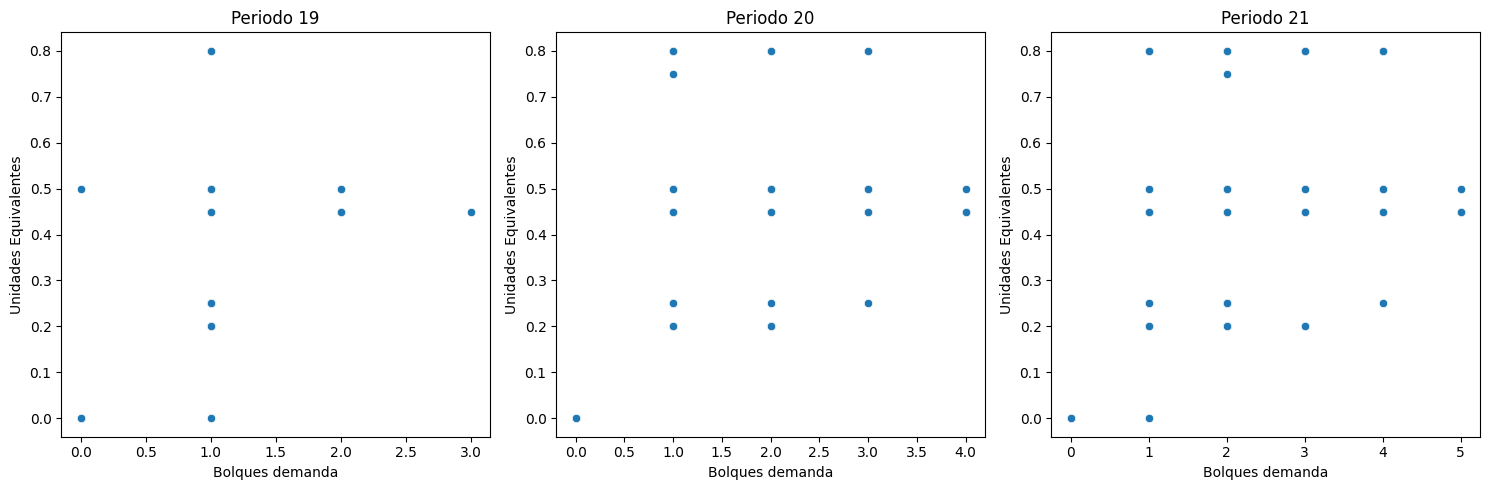

In [61]:
df_punta2=df_DemSubCar2.groupby(['Fecha'])[['NombreSub',19,20,21]].sum()
df_punta2['NombreSub'] = 'Caribe2'
df_punta2 = df_punta2.round({19: 2, 20: 2, 21: 2})

def Car2Values(x):

    if x>2200 and x<=2250:
        return 1
    elif x>2250 and x<=2300:
        return 2
    elif x>2300 and x<=2350:
        return 3
    elif x>2350 and x<=2400:
        return 4
    elif x>2400:
        return 5
    else:
        return 0

df_punta2[[19, 20, 21]] = df_punta2[[19, 20, 21]].applymap(Car2Values)

df_Bol=df_Zon[(df_Zon['NombreZona']=='ZS_BOLIVAR') & (df_Zon['Tipo']=='UN')][['Fecha','NombreZona',19,20,21]]
df_Bol.rename(columns={19: '19B', 20: '20B', 21: '21B'}, inplace=True)
df_punta2=df_punta2.merge(df_Bol,left_on=['Fecha'],right_on=['Fecha'], how='left')[['Fecha', 19, 20, 21,'19B','20B','21B']]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for column 19 vs 19B
sns.scatterplot(data=df_punta2, x=19, y='19B', ax=axes[0]).set_title('Periodo 19')
axes[0].set_xlabel('Bolques demanda')
axes[0].set_ylabel('Unidades Equivalentes')

# Scatter plot for column 20 vs 20B
sns.scatterplot(data=df_punta2, x=20, y='20B', ax=axes[1]).set_title('Periodo 20')
axes[1].set_xlabel('Bolques demanda')
axes[1].set_ylabel('Unidades Equivalentes')

# Scatter plot for column 21 vs 21B
sns.scatterplot(data=df_punta2, x=21, y='21B', ax=axes[2]).set_title('Periodo 21')
axes[2].set_xlabel('Bolques demanda')
axes[2].set_ylabel('Unidades Equivalentes')

plt.tight_layout()
plt.show()

In [77]:
# Lectura de datos de enrtrada para el cálculo
s_parentpath=s_mainpath
filepath=s_parentpath.joinpath(s_parentpath,'ArchivosEntrada','IPOEM.xlsx')

# Caribe 2 1300-1400
sheet_name='Caribe2'
skip_rows = 1
start_col=0
end_col = 2
end_row = 12
df_UniCar2_1=pd.read_excel(filepath, header=0,sheet_name=sheet_name, usecols=range(start_col, end_col+1),skiprows=skip_rows, nrows=end_row+1)

# Caribe 2 1200-1300
sheet_name='Caribe2'
skip_rows = 1
start_col=4
end_col = 6
end_row = 6
df_UniCar2_2=pd.read_excel(filepath, header=0,sheet_name=sheet_name, usecols=range(start_col, end_col+1),skiprows=skip_rows, nrows=end_row+1)
for col in df_UniCar2_2.columns:
    df_UniCar2_2.rename(columns={col:col[:-2]},inplace=True)

# Caribe 2 1300-1400 T3
sheet_name='Caribe2'
skip_rows = 1
start_col=8
end_col = 10
end_row = 16
df_UniCar2_1T3=pd.read_excel(filepath, header=0,sheet_name=sheet_name, usecols=range(start_col, end_col+1),skiprows=skip_rows, nrows=end_row+1)
for col in df_UniCar2_1T3.columns:
    df_UniCar2_1T3.rename(columns={col:col[:-2]},inplace=True)

#Unidades equivalnete
sheet_name='PesoUni'
skip_rows = 0
start_col=0
end_col = 4
end_row = 100
df_PesoUni_Car2=pd.read_excel(filepath, header=0,sheet_name=sheet_name, usecols=range(start_col, end_col+1), nrows=end_row+1) 

# Unidades Atlantico
sheet_name='Atlantico'
skip_rows = 0
start_col=0
end_col = 2
end_row = 30
df_UniAtl=pd.read_excel(filepath, header=0,sheet_name=sheet_name, usecols=range(start_col, end_col+1),skiprows=skip_rows, nrows=end_row+1)

# Caribe 2 1300-1400
sheet_name='Bolivar'
skip_rows = 0
start_col=0
end_col = 2
end_row = 30
df_UniBol=pd.read_excel(filepath, header=0,sheet_name=sheet_name, usecols=range(start_col, end_col+1),skiprows=skip_rows, nrows=end_row+1)


In [78]:
# Calcular la demanda de Caribe 2 sumando al demanda de las subáreas respectivas a partir de la demanda de los archivos de despacho
l_per=[i for i in range(1,25)]
df_DemCar2Desp=df_DemSubCar2.groupby('Fecha')[l_per].sum()


In [79]:
df_DemCar2Desp.to_csv('DemandaCaribe2.csv')

In [80]:
# Función para calcular la demanda de Caribe 2 de los archivos PRONAREAS
def CalDemCar2(sFolder):
    # Demanda Caribe archivos demanda pronóstico
    pathfoder=Path('C:\AnalisisElectrico\Demanda')
    # sFolder='Oficial_Ini'
    ano=2025
    pathfoder=pathfoder.joinpath(pathfoder,sFolder)

    # Definir encabezados
    l_col=['Subarea','Per']
    l_col2=['Subarea','Per','Tipo']
    l_values=[]
    for i in range(1,8):
        l_col.append(i)
        l_col2.append(i)
        l_values.append(i)


    # stfiles=[file.lower() for file in os.listdir(pathfoder)]
    # Determinar lso archivos que están dentro de la carpeta
    stfiles=os.listdir(pathfoder)
    stfiles=sorted(stfiles)

    df_DemPA=pd.DataFrame()
    # Recorrer el nombre de cada uno de los archivos para leerlo
    for file in stfiles:
        
        mes=file[-8:-6]
        dia=file[-6:-4]
        # print(file,mes,dia)
        pathFile=pathfoder.joinpath(file)

        # Identificar si el archivo tiene formato diferente
        with open(pathFile, 'r') as file:
            # Read the first line
            first_line = file.readline()
            split_line = first_line.split(',')

        if (split_line[2]=='EN') or (split_line[2]=='POT'):

            df_Aux = pd.read_csv(pathFile, sep=',',names=l_col2,encoding="ISO-8859-1")
            df_Aux.drop(['Tipo'],axis=1,inplace=True)
            l_sub=['SubAtlantico','SubBolivar','SubGCM']
        else:
            df_Aux = pd.read_csv(pathFile, sep=',',names=l_col,encoding="ISO-8859-1")
            l_sub=['SUBATLANTICO','SUBBOLIVAR','SUBGCM']


        # Determinar la fecha inicial a partir de fecha del archivo de pronóstico
        s_FechaIni=str(ano) + '-' + str(mes) + '-' + str(dia)
        dFecha=dt.datetime.strptime(s_FechaIni,'%Y-%m-%d')
        dFechaFin=dFecha+(6*delta)

        # Hacer el recorrido de las fechas durante 7 días
        icont=1
        while dFecha<=dFechaFin:

            # Obtener los datos de cada día y asignar la fecha
            df_dia=df_Aux[['Subarea','Per',icont]]

            df_Aux1=df_dia.pivot(index=['Subarea'],columns=['Per'],values=[icont])
            df_Aux1=pd.DataFrame(df_Aux1.loc[l_sub].sum(axis=0)).T
            df_Aux1.columns = [col[1] for col in df_Aux1.columns]
            df_Aux1.reset_index(drop=True,inplace=True)
            df_Aux1['Fecha']=dFecha
            df_Aux1.set_index(['Fecha'],inplace=True)

            df_DemPA=pd.concat([df_DemPA,df_Aux1])

            icont=icont+1
            dFecha=dFecha+delta

    return df_DemPA
        


In [81]:
# Graficar la distribución de los errores

def GraficaHist(df_data):
    # Create subplots
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 8))

    ValMin=df_data.min().min()
    ValMax=df_data.max().max()

    # Plot histograms for each column
    for i, col in enumerate(df_data.columns):
        ax = axes[i // 6, i % 6]
        ax.hist(df_data[col], bins=10, alpha=0.6)
        ax.set_title(col)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.set_xlim([ValMin*1.2,ValMax*1.2])

    plt.tight_layout()
    plt.show()

In [82]:
# Función para calcular las unidades según la demanda
def CalcularUnidades(Demanda,df_data,df_dataIni,Fecha):
    # print(Demanda,Fecha)
    if Fecha==dt.datetime.strptime('2024-01-02','%Y-%m-%d'):
        stop=1
    if Fecha>=dt.datetime.strptime('2024-02-01','%Y-%m-%d'):
        rows,cols=df_data.shape

        if (Demanda>df_data.at[0,'ValMin']) and (Demanda<=df_data.at[rows-1,'ValMax']):

            Val=df_data[(Demanda>df_data.ValMin) & (Demanda<=df_data.ValMax)]['Unidades'].values[0]

        else:
            Val=0
    else:
        rows,cols=df_dataIni.shape

        if (Demanda>=df_dataIni.at[0,'ValMin']) and (Demanda<=df_dataIni.at[rows-1,'ValMax']):

            Val=df_dataIni[(Demanda>df_dataIni.ValMin) & (Demanda<=df_dataIni.ValMax)]['Unidades'].values[0]

        else:
            Val=0

    return Val

In [83]:
def ApplyFuncyionValue(df_Apply,df_data,df_dataIni):

    l_df=[]
    for ind in df_Apply.index:
        #print(ind)
        l_row=[]
        for col in df_Apply.columns:
            x=df_Apply.at[ind,col]
            Fecha=ind
            if (Fecha==dt.datetime.strptime('2025-03-03','%Y-%m-%d')) and col==20:
                    stop=1
            val=CalcularUnidades(x,df_data,df_dataIni,Fecha)
            l_row.append(val)
        l_df.append(l_row)

    df_Results=pd.DataFrame(l_df,index=df_Apply.index,columns=df_Apply.columns)
    return df_Results

In [84]:
# Función para asignar los días de la semana a cada fecha, si es festivo se trata como un domingo
import holidays
co_holidays = holidays.Colombia()

def typedays(row,weekday):

     if weekday==True:
          return row['Fecha'].weekday()
     else:
          if row['Fecha'] in co_holidays:
               return 3
          elif row['Fecha'].weekday()==5:
               return 2
          elif row['Fecha'].weekday()==6:
               return 3
          else:
               return 1

In [85]:
# Calculo de la demanda de caribe 2 según la carperta donde esté la información
df_DemPA_Ofi_Ini=CalDemCar2('Oficial_Ini') # Demanda con archivos oficiales iniciales (Bajados del PON)
df_DemPA_Ofi_Mod=CalDemCar2('Oficial_Mod') # Demanda con archivos del despacho cuyos valores son los finales después de la afectación de los agentes

In [86]:
#df_DemPA_Ofi_Mod=CalDemCar2('Oficial_Mod') # Demanda con archivos del despacho cuyos valores son los finales después de la afectación de los agentes

In [87]:
# Diferencia dDem vs PronAras
df_Dif_dDem_PA=df_DemCar2Desp-df_DemPA_Ofi_Mod

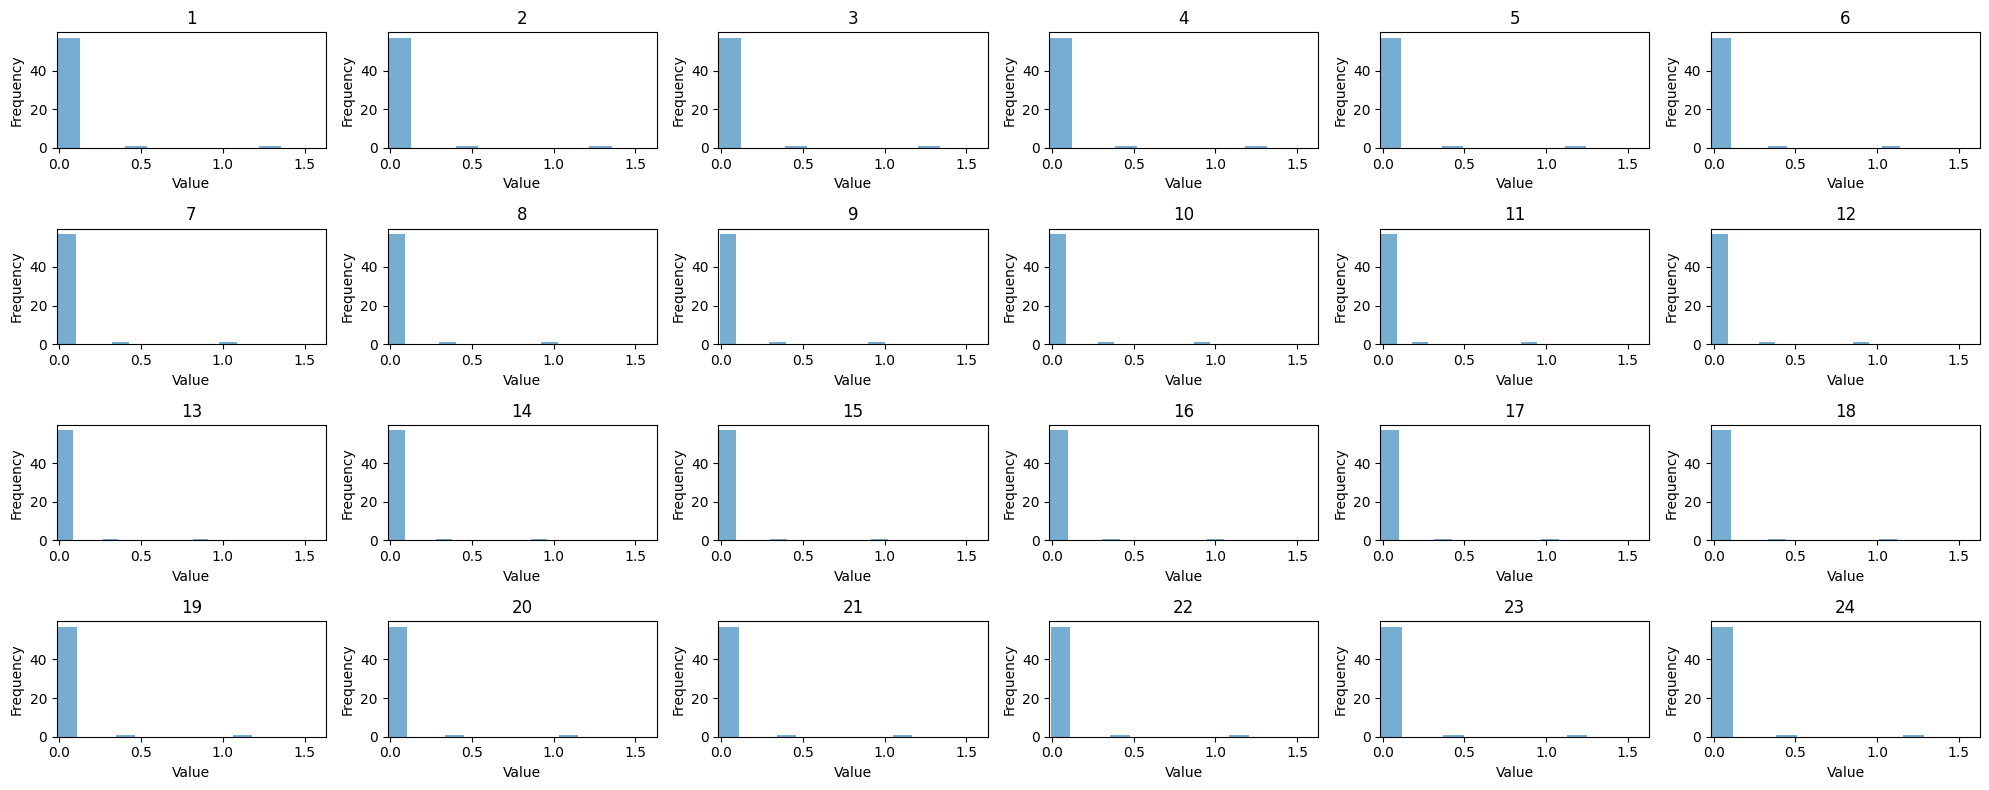

In [88]:
# Grafica dDem vs PronAreas
GraficaHist(df_Dif_dDem_PA)

In [89]:
# Diferencia de las demandas Oficila y Modificado
df_dif_DemCar2=df_DemPA_Ofi_Ini.subtract(df_DemPA_Ofi_Mod)

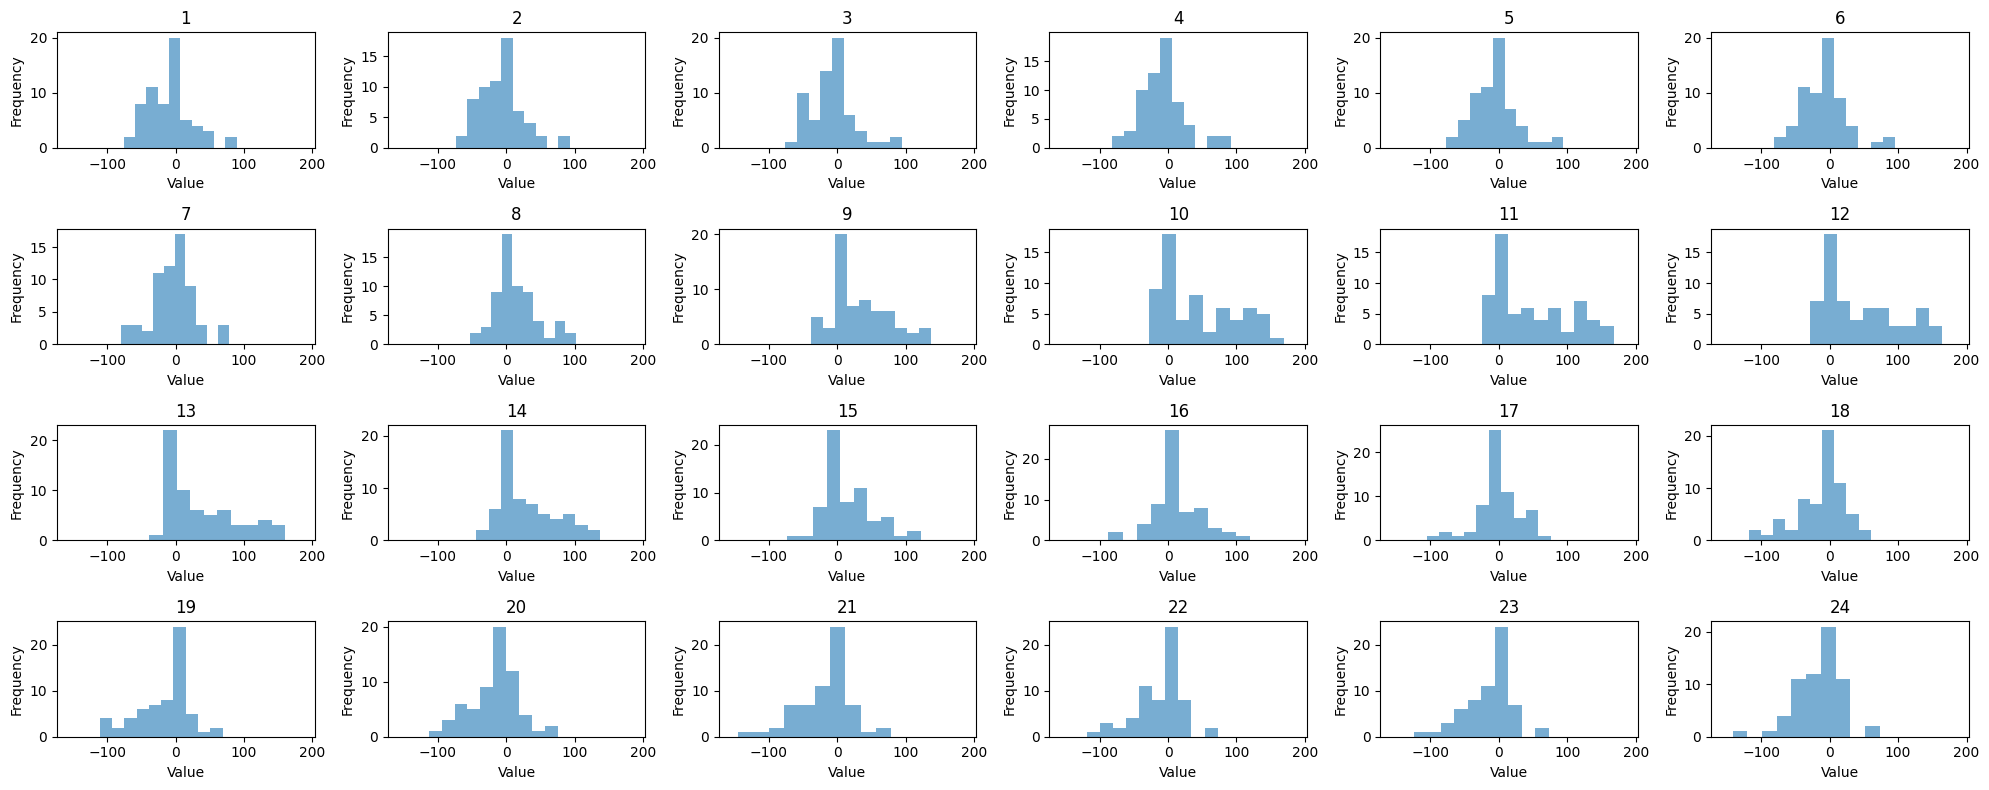

In [90]:
# Grafica demanda Inicial vs Demanda MOdificada en el despacho
GraficaHist(df_dif_DemCar2)

In [91]:
# Calculo de unidades equivalentes a partir de la demanda
df_UniCar2_OfiIni=ApplyFuncyionValue(df_DemPA_Ofi_Ini,df_UniCar2_1,df_UniCar2_1T3) # Unidades equivalentes a partir de la demanda Inicial
df_UniCar2_OfiMod=ApplyFuncyionValue(df_DemPA_Ofi_Mod,df_UniCar2_1,df_UniCar2_1T3) # Unidades equivalentes a partir de la demanda Modificada

In [92]:

# # Calculo de unidades equivalentes a partir de la demanda
# df_UniCar2_OfiIni = df_DemPA_Ofi_Ini.applymap(lambda x: CalcularUnidades(x,df_UniCar2_1)) # Unidades equivalentes a partir de la demanda Inicial
# df_UniCar2_OfiMod = df_DemPA_Ofi_Mod.applymap(lambda x: CalcularUnidades(x,df_UniCar2_1,)) # Unidades equivalentes a partir de la demanda Modificada

In [93]:
# Difereencia unidades equivalente Inicial vs Modificado
df_Dif_UniCar2_IniMod=df_UniCar2_OfiIni-df_UniCar2_OfiMod

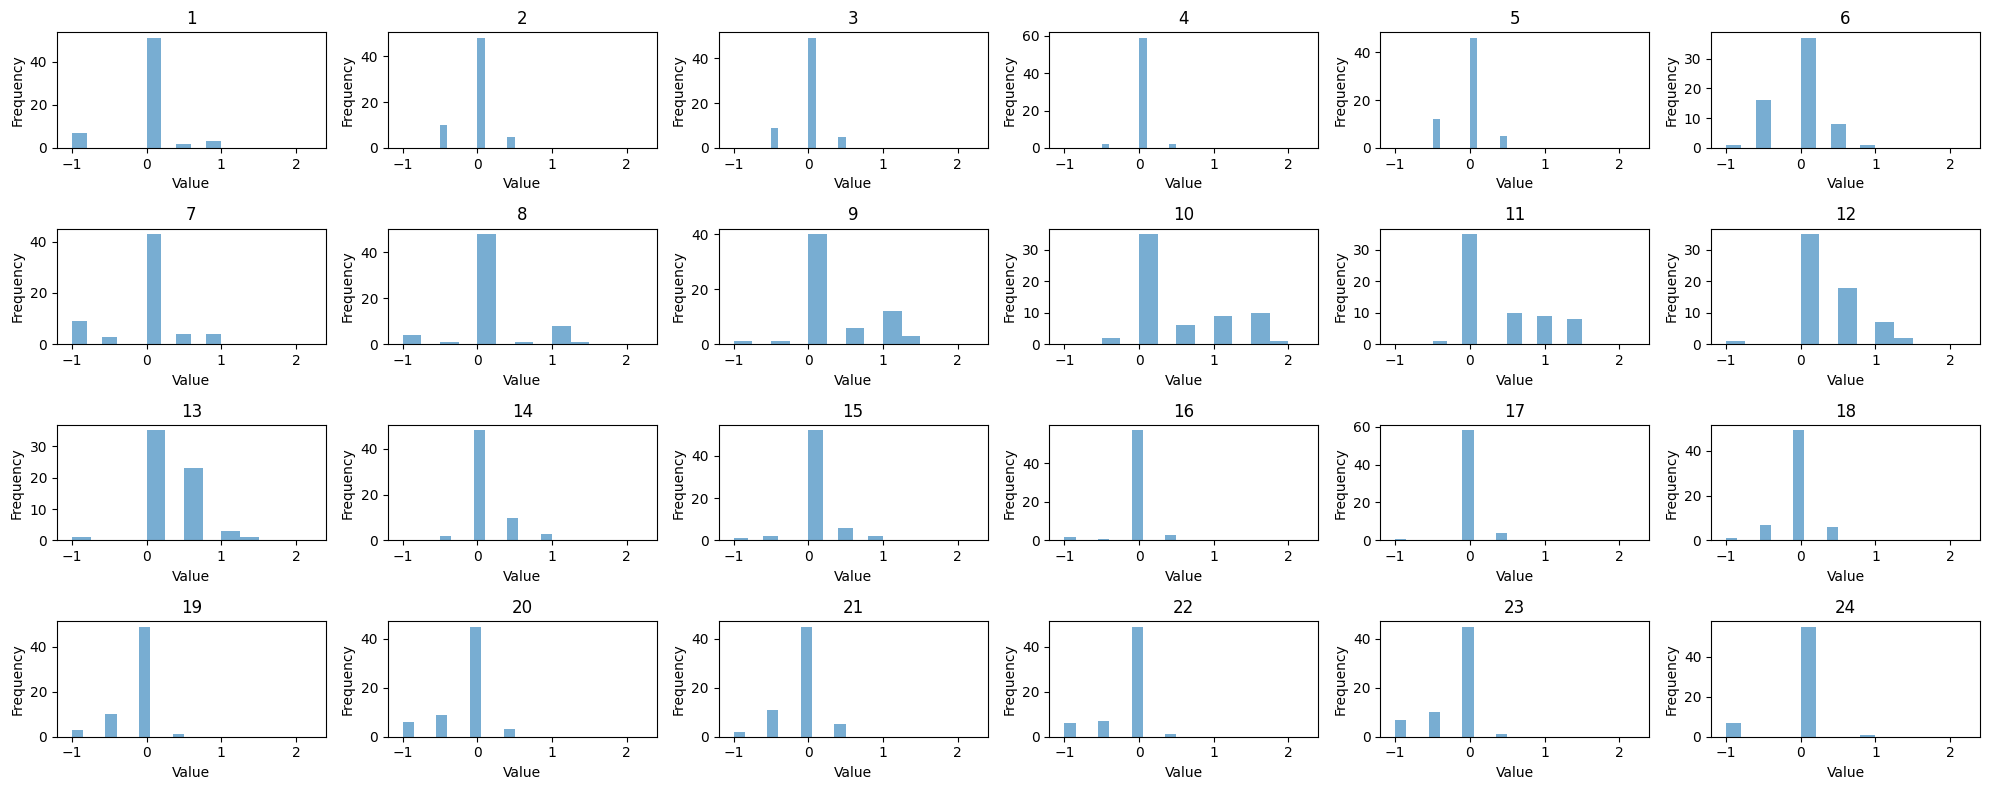

In [94]:
# Grafica unidades Inicial vs unidades MOdificada en el despacho
GraficaHist(df_Dif_UniCar2_IniMod)

In [95]:
# Unidades programadas por el despacho
df_UniCar2Desp=df_Zon[(df_Zon.NombreZona=='ZS_CARIBE2') & (df_Zon.Tipo=='UN')]

In [96]:
l_col=['Fecha']

for i in range(1,25):
    l_col.append(i)

df_UniCar2Desp=df_UniCar2Desp[l_col]
df_UniCar2Desp.set_index('Fecha',inplace=True)

In [97]:
# Diferencia de las unidades calculadas en le IPOEM con base en la demanda oficial modificada y las unidades calcuadas por el despacho
df_Dif_UniMod_UniCar2Desp=df_UniCar2_OfiMod-df_UniCar2Desp

In [98]:
df_Dif_UniMod_UniCar2Desp.to_csv('Dif_Uni_Mod_Desp.csv')

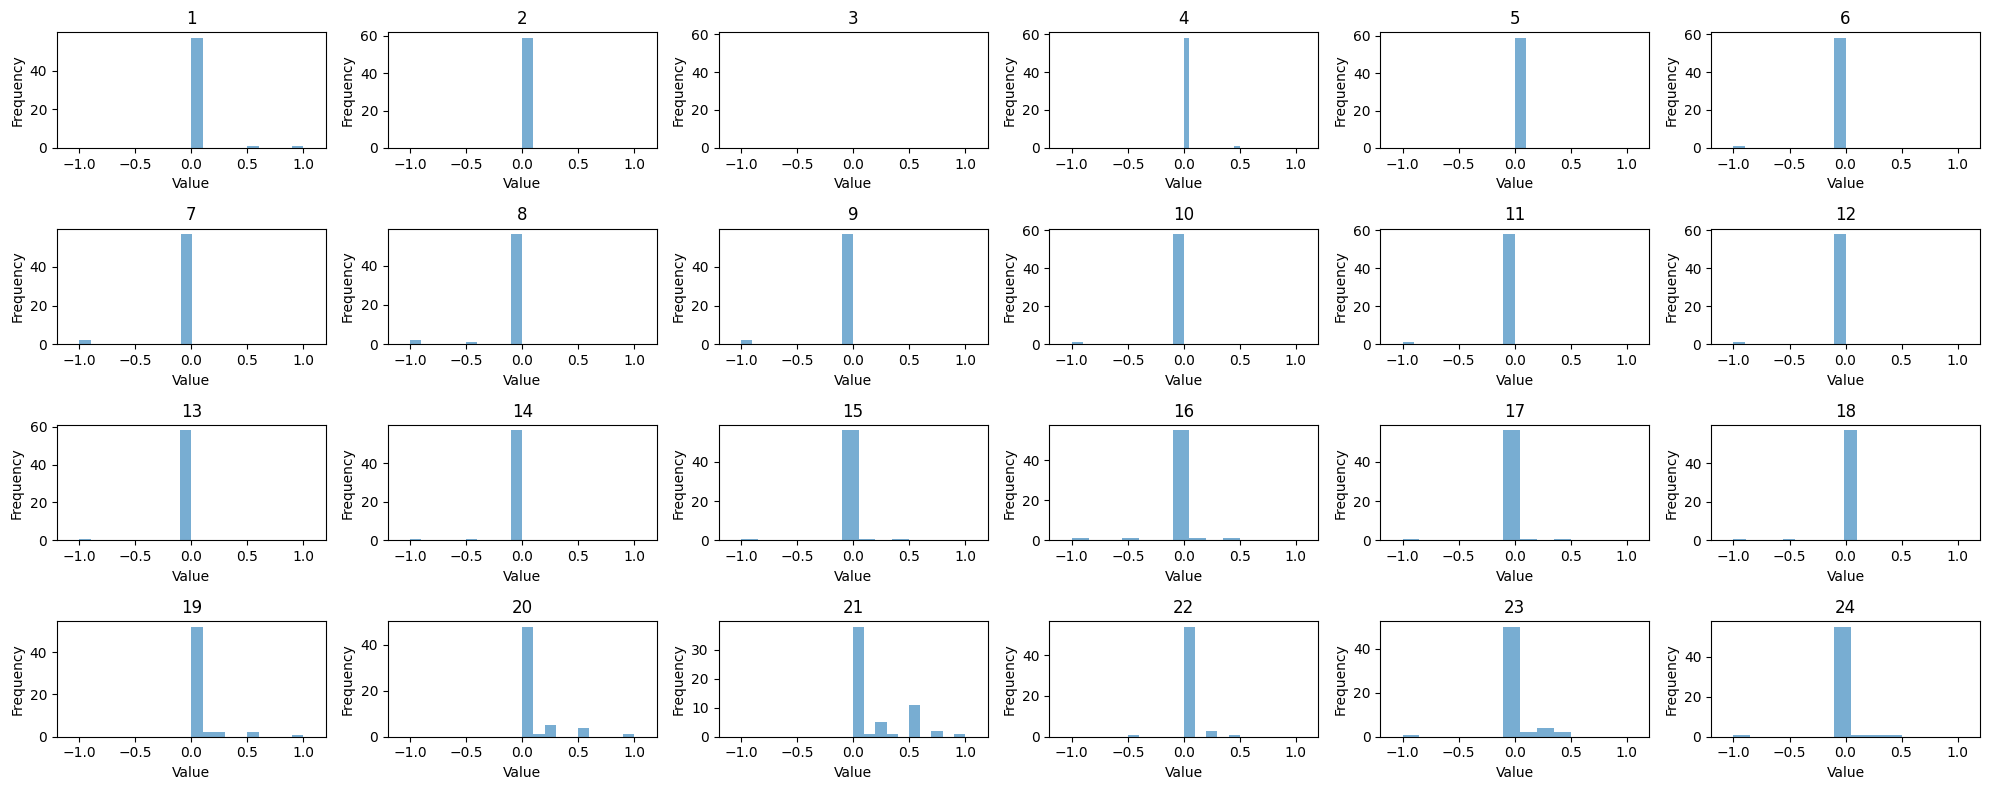

In [99]:
# Grafica unidades IPOEN con demanda modificada vs unidades programdas en el despacho
GraficaHist(df_Dif_UniMod_UniCar2Desp)

Separación de los casos por tipo de día para observar el comportamiento del despacho

In [100]:
# Definir tipo de día
df_Dif_UniMod_UniCar2Desp.reset_index(inplace=True)
df_Dif_UniMod_UniCar2Desp['day_osf']=df_Dif_UniMod_UniCar2Desp.apply(lambda row: typedays(row,weekday=False),axis=1)

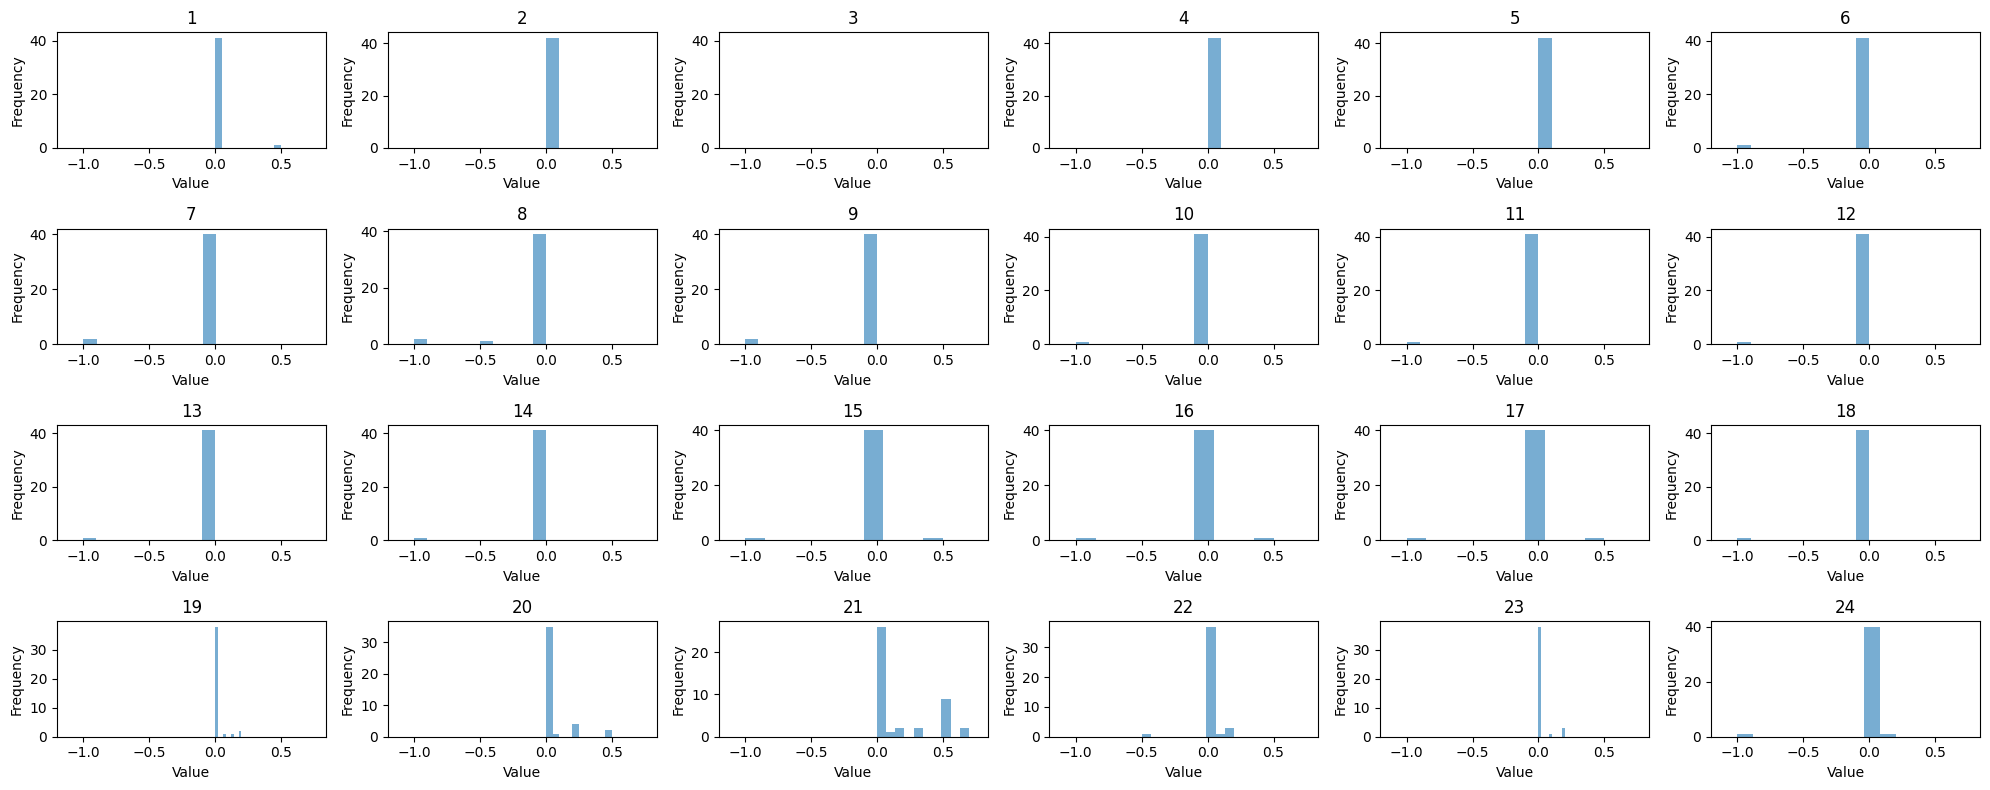

In [101]:
df_Ord=df_Dif_UniMod_UniCar2Desp[df_Dif_UniMod_UniCar2Desp.day_osf==1]
df_Ord.set_index('Fecha',inplace=True)
df_Ord.drop('day_osf',axis=1,inplace=True)
GraficaHist(df_Ord)

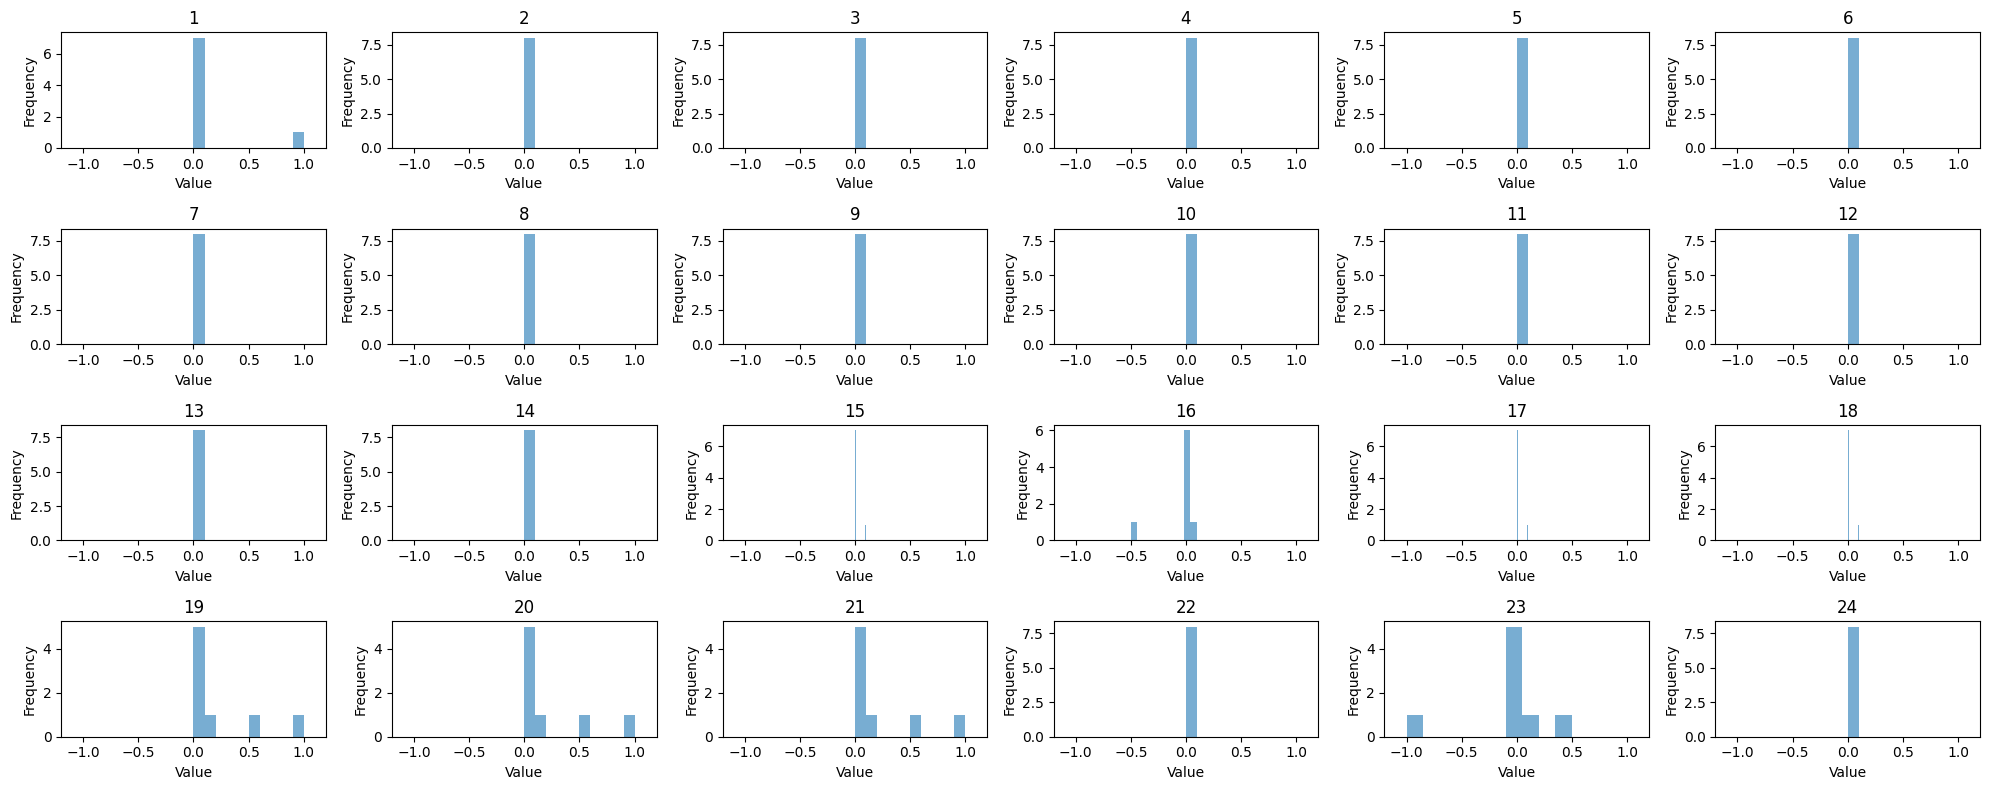

In [102]:
df_Ord=df_Dif_UniMod_UniCar2Desp[df_Dif_UniMod_UniCar2Desp.day_osf==2]
df_Ord.set_index('Fecha',inplace=True)
df_Ord.drop('day_osf',axis=1,inplace=True)
GraficaHist(df_Ord)

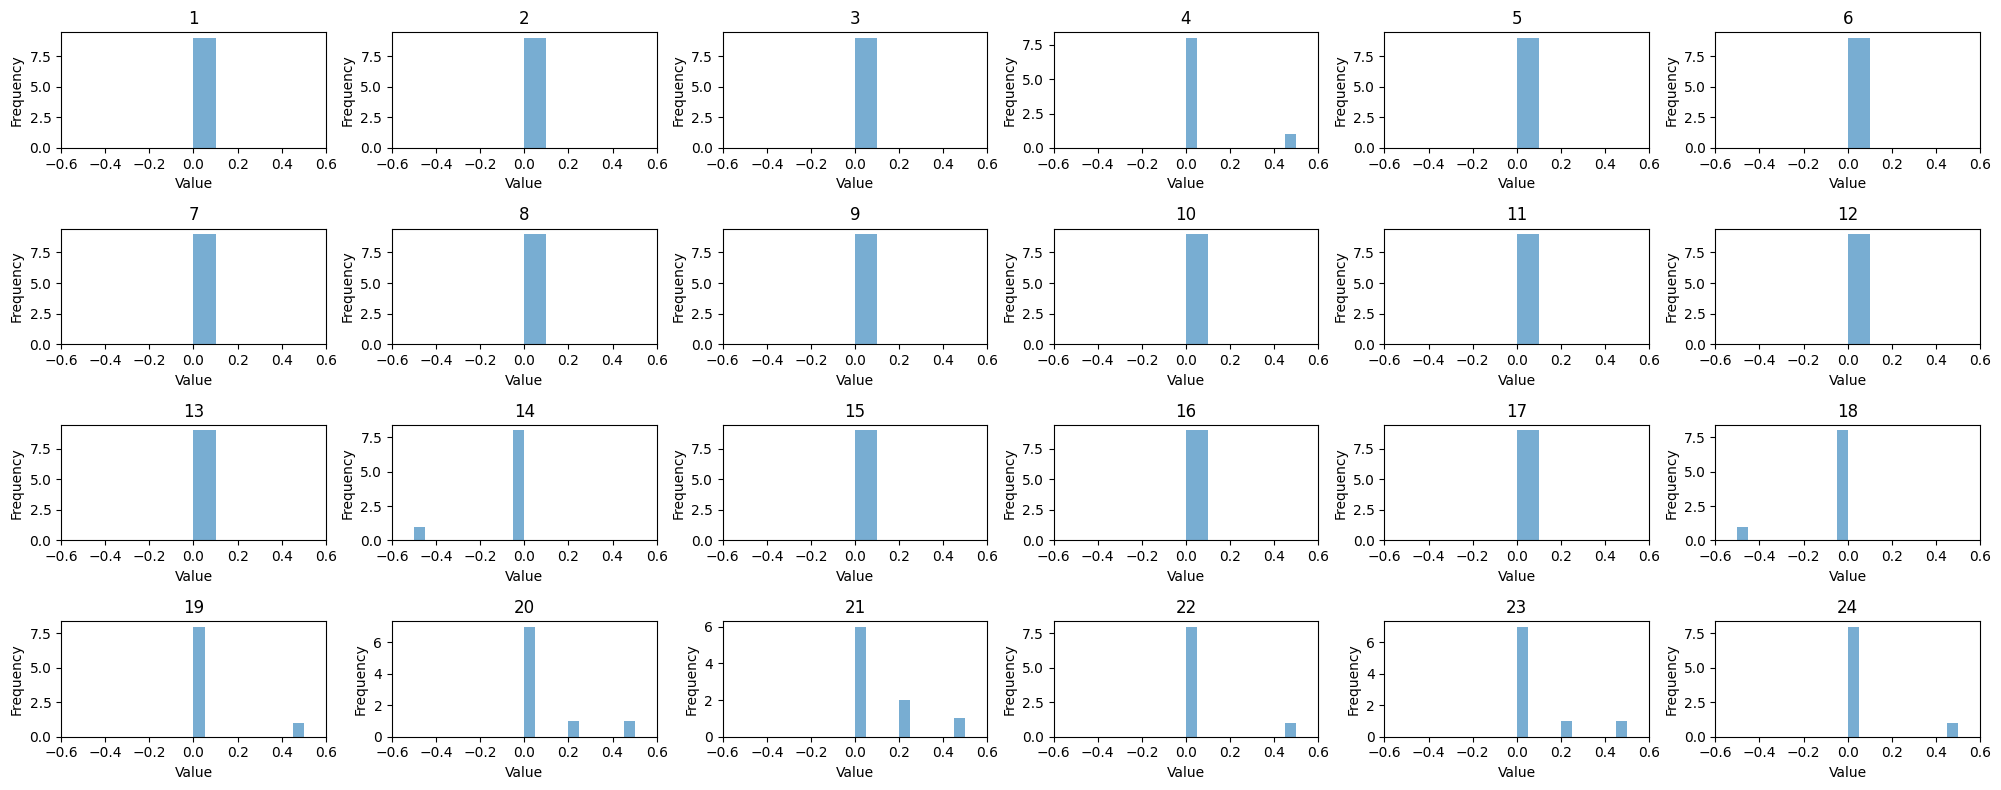

In [103]:
df_Ord=df_Dif_UniMod_UniCar2Desp[df_Dif_UniMod_UniCar2Desp.day_osf==3]
df_Ord.set_index('Fecha',inplace=True)
df_Ord.drop('day_osf',axis=1,inplace=True)
GraficaHist(df_Ord)

In [104]:
# Unidades calculadas con la demanda del despacho
# df_UniCar2Desp_Cal = df_DemCar2Desp.applymap(lambda x: CalcularUnidades(x,df_UniCar2_1))
# df_UniCar2Desp_Cal = ApplyFuncyionValue(df_DemCar2Desp,df_UniCar2_1,df_UniCar2_1T3)

In [105]:
# Diferencia de las unidades calculadas en le IPOEM con base en la oficial original y las unidades calcuadas por el despacho
df_Dif_UniIni_UniCar2Desp=df_UniCar2_OfiIni-df_UniCar2Desp

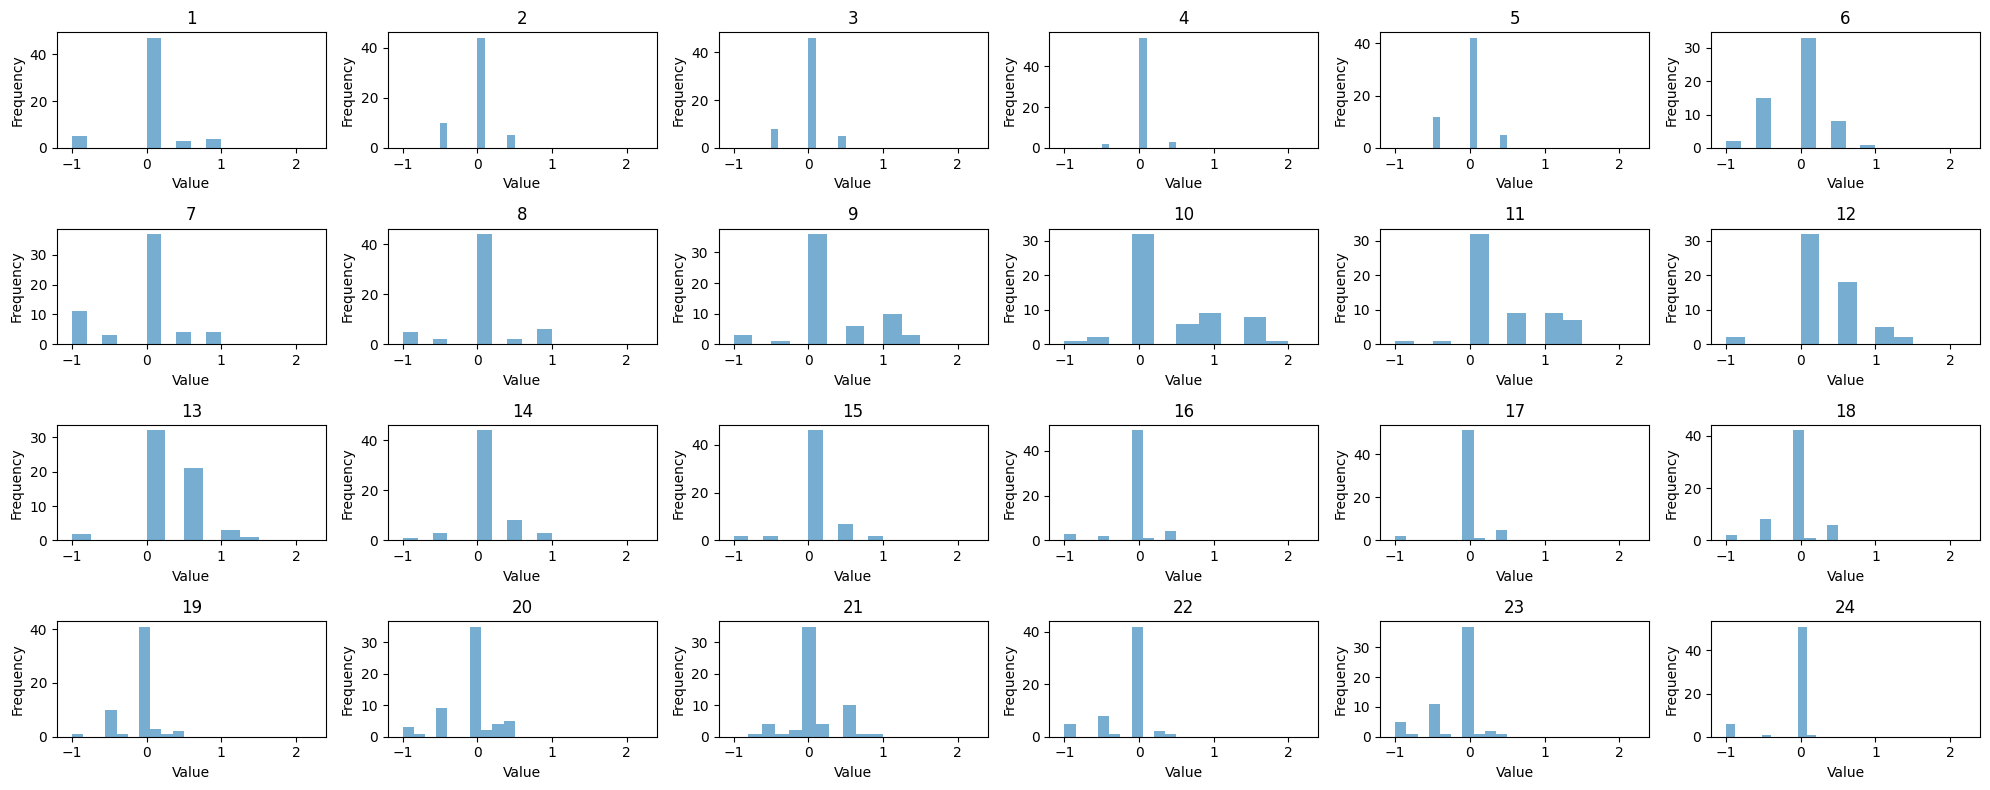

In [106]:
# Grafica unidades IPOEM con demanda inicial del PA vs unidades programdas en el despacho
GraficaHist(df_Dif_UniIni_UniCar2Desp)

### Filtros para la información de Unidades programadas Despacho
Esto filtros es para comparar la informción con las estadística del excel

In [107]:
df_UniDespBase=df_UniCar2Desp.copy()
df_UniDespBase.reset_index(inplace=True)
df_UniDespBase=df_UniDespBase[(df_UniDespBase['Fecha']>=dt.datetime.strptime('2024-02-01','%Y-%m-%d')) & (df_UniDespBase['Fecha']<=dt.datetime.strptime('2024-03-17','%Y-%m-%d'))]

In [108]:
df_UniDespBase['day_osf']=df_UniDespBase.apply(lambda row: typedays(row,weekday=False),axis=1)
df_UniDespBase['day_w']=df_UniDespBase.apply(lambda row: typedays(row,weekday=True),axis=1)

ValueError: Cannot set a DataFrame with multiple columns to the single column day_osf

In [ ]:
df_gb_diaw=df_UniDespBase.groupby('day_w')[l_per].mean()

#### Se debe hacer tratamiento de datos atípicos. Se validó y los datos atípicos que se habían identificado era debido al cambio de IPOEM, por lo tanto se ajustó que hasta el 31/01/2024 se calculara con el IPOEMP anterior
Esta se realizaría validando si la reconmendación del despacho que es atípica, está con un valor muy diferente al que daría la recomendación calculando los valores del IPOEMP con la demanda que utilizó el despacho. Se ha observado que cuando la demanda está en el límite superior de un número de unidades determinado por la curva que entrega IPOEMP, es posbile pasar el la siguiente recomendación de unidades (validar con un acercamiento por ejemplo de 20%), pero si está en el límite inferior y a pesar de eso se seleccionó el número de unidades del siguiente bloque de demanda se debe hacer limpieza de este dato. Una opción es poner lo que se debió marcar por IPOEM. Validar datos atípicos siempre que se tenga limite en 1475.

#### Modelo Random Forest

Se realiza un modelo para cada periodo, las variables de entrada son:
- La demanda de carbe 2 tomada a partir de la demanda del viernes (El modelo reflejaría en las unidades elegidas los cambio de demanda que realizan los agentes, otra forma es entrenarmo con la demanda que usó el despacho y como demanda de entrada utilzar una propia)
- El límite
- El tipo de día

La salida es:
- Unidades del despacho

In [ ]:
d_FechaIni
d_FechaFin

datetime.datetime(2024, 4, 21, 0, 0)

In [ ]:
# Procesar la información de demanda
df_Dem=df_DemPA_Ofi_Ini.copy()
df_Dem.reset_index(inplace=True)
df_Dem=df_Dem[(df_Dem.Fecha>=d_FechaIni) & (df_Dem.Fecha<=d_FechaFin)]


# Procesar la información del límita
df_Lim=df_Limp.copy()
df_Lim.reset_index(drop=True,inplace=True)
df_Lim.drop('NombreSub',axis=1,inplace=True)
df_Lim=pd.melt(df_Lim,id_vars=['Fecha'],var_name='Periodo', value_name='Lim')

# Procesar la información de la unidades
df_Uni=df_UniCar2Desp.copy()
df_Uni.reset_index(inplace=True)
df_Uni=pd.melt(df_Uni,id_vars=['Fecha'],var_name='Periodo', value_name='Uni')


# Definir tipo de día
df_Dem['day_osf']=df_Dem.apply(lambda row: typedays(row,weekday=False),axis=1)
# Definir día de la semana
df_Dem['day_w']=df_Dem.apply(lambda row: typedays(row,weekday=True),axis=1)
# Definir los periodos en una columna
df_Dem = pd.melt(df_Dem, id_vars=['Fecha','day_osf','day_w'], var_name='Periodo', value_name='Dem')

# Make inner join with limits
l_columns=list(df_Dem.columns)
l_columns.append('Lim')
df_data=pd.merge(df_Dem,df_Lim,left_on=['Fecha','Periodo'],right_on=['Fecha','Periodo'], how='inner')[l_columns]

l_columns.append('Uni')
df_data=pd.merge(df_data,df_Uni,left_on=['Fecha','Periodo'],right_on=['Fecha','Periodo'], how='inner')[l_columns]

df_data['Periodo']=df_data['Periodo'].astype('int64')


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    1272 non-null   datetime64[us]
 1   day_osf  1272 non-null   int64         
 2   day_w    1272 non-null   int64         
 3   Periodo  1272 non-null   int64         
 4   Dem      1272 non-null   float64       
 5   Lim      1272 non-null   int64         
 6   Uni      1272 non-null   float64       
dtypes: datetime64[us](1), float64(2), int64(4)
memory usage: 69.7 KB


In [ ]:
l_col=list(df_data.columns)
l_col.remove('Fecha')
df_dataMod=df_data[l_col]

In [ ]:
df_dataMod

,day_osf,day_w,Periodo,Dem,Lim,Uni
0,1,3,1,1865.492010,1475,4.0
1,1,4,1,1871.871255,1475,4.0
2,2,5,1,1812.750718,1475,4.0
3,3,6,1,1822.192011,1475,4.0
4,1,0,1,1788.979969,1475,4.0
...,...,...,...,...,...,...
1267,1,2,24,2016.683259,1475,4.5
1268,1,3,24,2016.842280,1475,6.0
1269,1,4,24,2036.003176,1475,6.0
1270,2,5,24,1969.837210,1475,4.5


In [ ]:
from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [ ]:
l_col=list(df_dataMod.columns)
l_col.remove('Uni')
df_dataMod_X=df_dataMod[l_col]
df_dataMod_y=pd.DataFrame(df_dataMod['Uni'])

In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = df_dataMod.columns
Datos_Min_Max = scaler.fit_transform(df_dataMod)
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

In [ ]:
Datos_Min_Max

,day_osf,day_w,Periodo,Dem,Lim,Uni
0,0.0,0.500000,0.0,0.522703,1.0,0.4
1,0.0,0.666667,0.0,0.530275,1.0,0.4
2,0.5,0.833333,0.0,0.460103,1.0,0.4
3,1.0,1.000000,0.0,0.471309,1.0,0.4
4,0.0,0.000000,0.0,0.431889,1.0,0.4
...,...,...,...,...,...,...
1267,0.0,0.333333,1.0,0.702157,1.0,0.5
1268,0.0,0.500000,1.0,0.702346,1.0,0.8
1269,0.0,0.666667,1.0,0.725089,1.0,0.8
1270,0.5,0.833333,1.0,0.646554,1.0,0.5


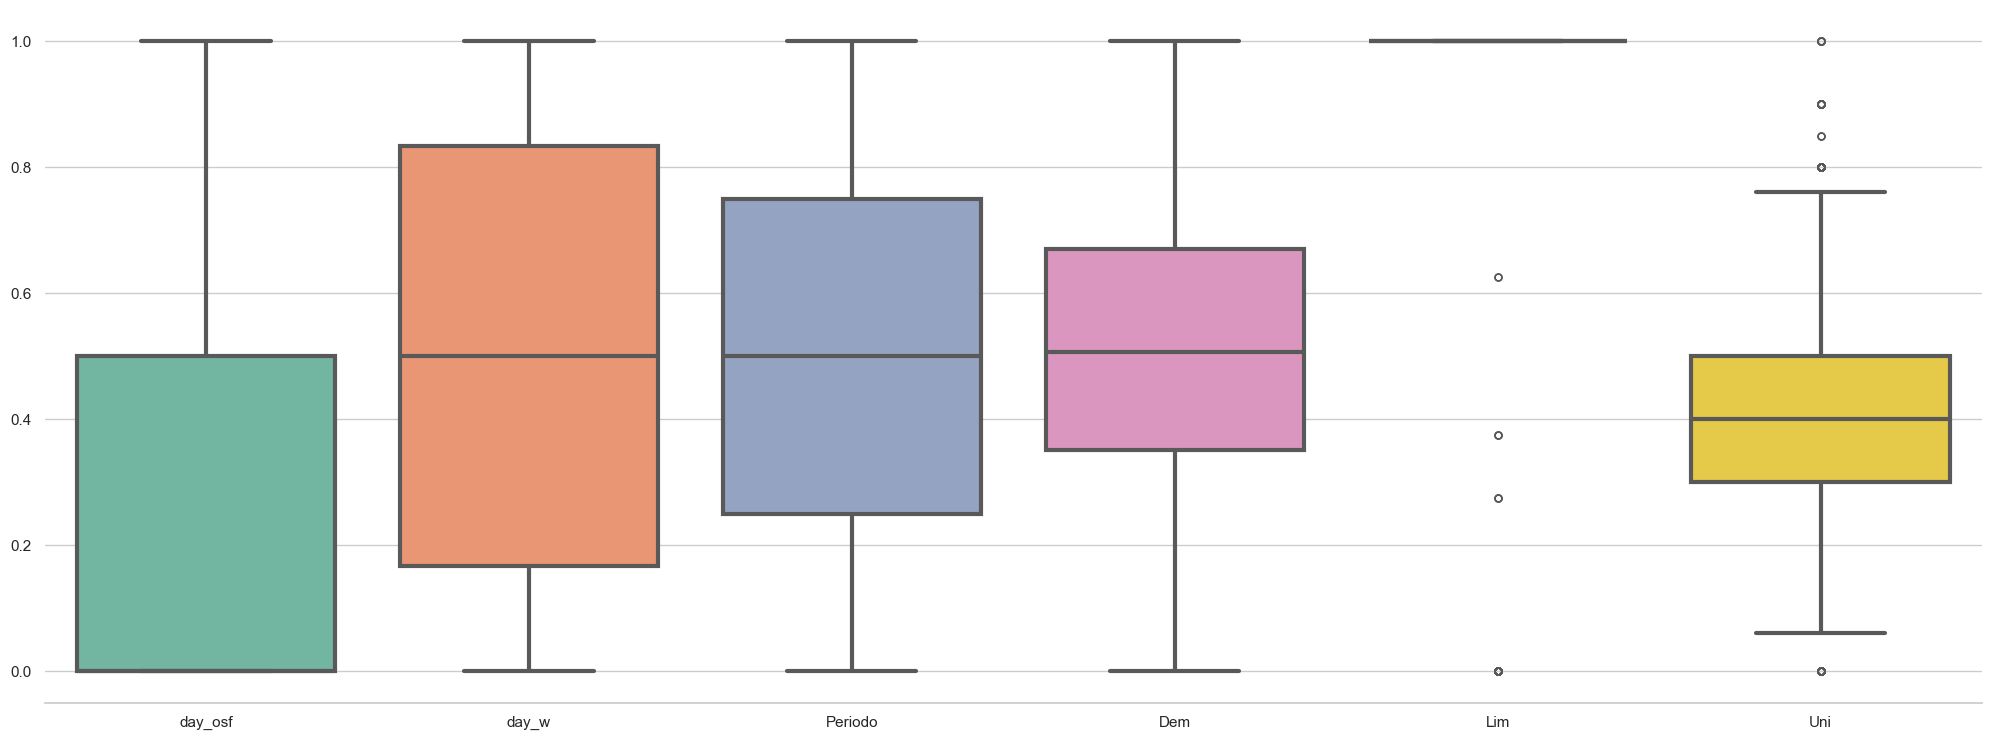

In [ ]:
#Se realiza un diagrama de cajas a los datos normalizados
sns.set(rc={'figure.figsize':(25,9)}) 
sns.set(style="whitegrid") 
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

In [ ]:
scaler_X = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = df_dataMod_X.columns
X_norm = scaler_X.fit_transform(df_dataMod_X)
X_norm = pd.DataFrame(X_norm, columns = nombres)

In [ ]:
scaler_y = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = df_dataMod_y.columns
y_norm = scaler_y.fit_transform(df_dataMod_y)
y_norm = pd.DataFrame(y_norm, columns = nombres)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X_norm,
                                        y_norm, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo

modelo = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features='sqrt',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )


# Entrenamiento del modelo
modelo.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=123)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Importar la función mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

def CalculoError(modelo,X_train,X_test,y_train,y_test):

    # Error de train del modelo inicial
    predicciones = modelo.predict(X = X_train)

    rmse = mean_squared_error(y_true  = y_train, y_pred  = predicciones, squared = True)
    print(f"El error (rmse) de train es: {rmse}")

    r2 = r2_score(y_train, predicciones)
    print(f"El error (r2) de train es: {r2}")

    score=modelo.score(X_train, y_train)
    print(f"El error (score) de train es: {score}")

    mape = mean_absolute_percentage_error(y_train, predicciones)
    print("El error MAPE train:", mape)

    mae = mean_absolute_error(y_train, predicciones)
    print("El error MAE train:", mae)

    # Error de test del modelo inicial
    predicciones = modelo.predict(X = X_test)

    rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = True)
    print(f"El error (rmse) de test es: {rmse}")

    r2 = r2_score(y_test, predicciones)
    print(f"El error (r2) de test es: {r2}")

    mape = mean_absolute_percentage_error(y_test, predicciones)
    print("El error MAPE test:", mape)

    mae = mean_absolute_error(y_test, predicciones)
    print("El error MAE train:", mae)


In [ ]:
CalculoError(modelo,X_train,X_test,y_train,y_test)

El error (rmse) de train es: 0.0012738020157325503
El error (r2) de train es: 0.9704656576867053
El error (score) de train es: 0.9704656576867053
El error MAPE train: inf
El error MAE train: 0.023595575221239066
El error (rmse) de test es: 0.0077769429803921635
El error (r2) de test es: 0.8201005306456733
El error MAPE test: inf
El error MAE train: 0.05942431372549031


In [ ]:
len(y_test)

255

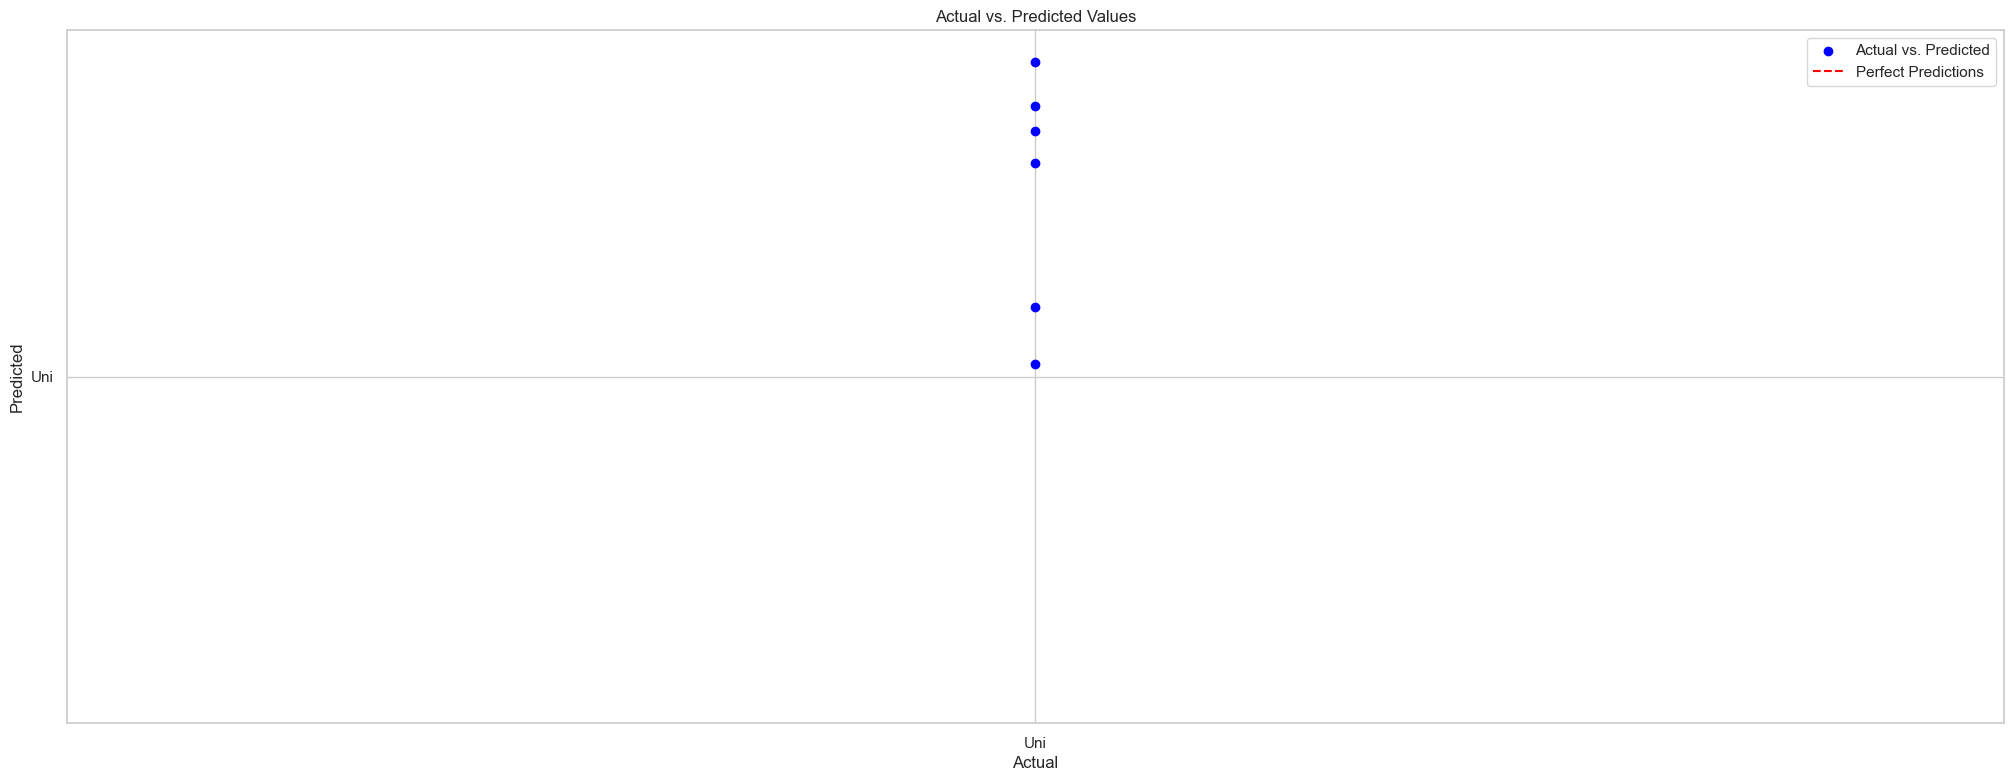

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and predictions are already defined
predicciones = modelo.predict(X = X_test)

# Plot the actual values (y_test) vs. predicted values (predictions)
plt.scatter(y_test, predicciones, color='blue', label='Actual vs. Predicted')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line to represent perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')

# Add legend
plt.legend()

# Show plot
plt.show()

#### Afinación del modelo variando hhiperparámetros

Valor óptimo de n_estimators(árboles): 56


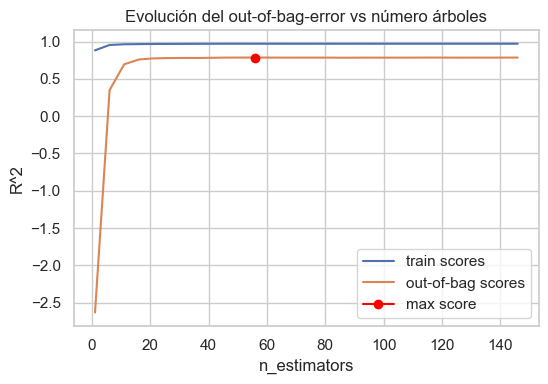

In [ ]:
# Afinación del modelo

train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error de entrenamiento.

for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 'sqrt',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    


# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators(árboles): {estimator_range[np.argmax(oob_scores)]}")

##### Usando Cross-Validation

Valor óptimo de n_estimators: 146


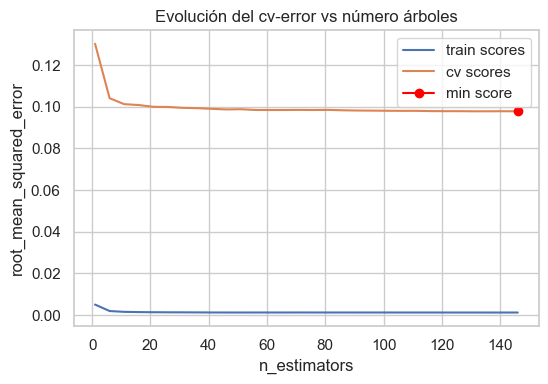

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error', #mean squared error: mse
                max_depth    = None,
                max_features = 'sqrt',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = True
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 2


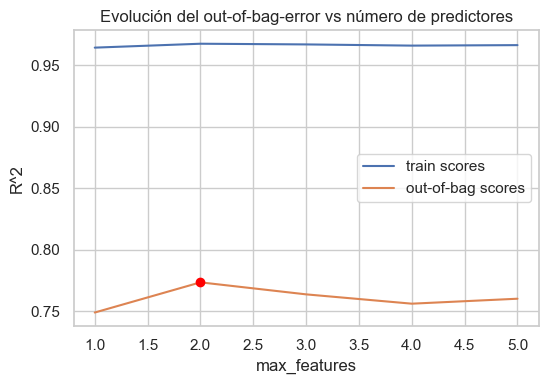

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1) #X_train.shape[1] = total de características


# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 20,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 2


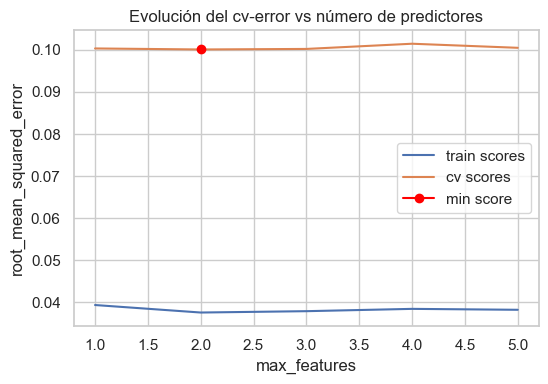

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

#### Hiperparametrización con ParameterGrid

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [20],
                 'max_features': [9, 11, 13, 15],
                 'max_depth'   : [3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(5)

Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 20} ✓
Modelo: {'max_depth': 3, 'max_features': 11, 'n_estimators': 20} ✓
Modelo: {'max_depth': 3, 'max_features': 13, 'n_estimators': 20} ✓
Modelo: {'max_depth': 3, 'max_features': 15, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'max_features': 11, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'max_features': 13, 'n_estimators': 20} ✓
Modelo: {'max_depth': 10, 'max_features': 15, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'max_features': 11, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'max_features': 13, 'n_estimators': 20} ✓
Modelo: {'max_depth': 20, 'max_features': 15, 'n_estimators': 20} ✓


,oob_r2,max_depth,max_features,n_estimators
0,0.778588,3,9,20
1,0.778588,3,11,20
2,0.778588,3,13,20
3,0.778588,3,15,20
4,0.775432,10,9,20


In [ ]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,:]['oob_r2'], "R2")

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
0.7785881775277437 R2


#### Hiperparametrización con RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el modelo
modelo = RandomForestRegressor()

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': randint(10, 200),  # Número de árboles en el bosque
    'max_depth': [None] + list(np.random.randint(2, 50, 10)),  # Profundidad máxima del árbol
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada split
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 20),  # Número mínimo de muestras requeridas para ser un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}

# Realizar búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros encontrados:
{'bootstrap': True, 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 122}


In [ ]:
# Obtener el mejor modelo
mejor_modelo_RS = random_search.best_estimator_

CalculoError(mejor_modelo_RS,X_train,X_test,y_train,y_test)

El error (rmse) de train es: 0.004997309006989965
El error (r2) de train es: 0.8841325158581465
El error (score) de train es: 0.8841325158581465
El error MAPE train: inf
El error MAE train: 0.04828375288349702
El error (rmse) de test es: 0.007015491101214651
El error (r2) de test es: 0.8377147512138665
El error MAPE test: inf
El error MAE train: 0.05805513217688748


#### Hiperparametrización con GridSearchCV

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [i for i in range(10,150,10)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth'   : [i for i in range(5,50,5)]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = 10, 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
# resultados = pd.DataFrame(grid.cv_results_)
# resultados.filter(regex = '(param.*|mean_t|std_t)') \
#     .drop(columns = 'params') \
#     .sort_values('mean_test_score', ascending = False) \
#     .head(4)

# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
CalculoError(modelo_final,X_train,X_test,y_train,y_test)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 130} : -0.09358274210689467 neg_root_mean_squared_error
El error (rmse) de train es: 0.006768360844711023
El error (r2) de train es: 0.8430689513608316
El error (score) de train es: 0.8430689513608316
El error MAPE train: inf
El error MAE train: 0.05724408477451883
El error (rmse) de test es: 0.007550897925197865
El error (r2) de test es: 0.8253294985810372
El error MAPE test: inf
El error MAE train: 0.06029793978716987


#### Importancia de los predictores del modelo arrojado por el RandomSearch

In [ ]:
mejor_modelo_RS.feature_importances_

array([0.0276565 , 0.03840392, 0.25924911, 0.66524235, 0.00944812])

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_data.drop(columns = ['Fecha','Uni']).columns,
                             'importancia': mejor_modelo_RS.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,Dem,0.665242
2,Periodo,0.259249
1,day_w,0.038404
0,day_osf,0.027657
4,Lim,0.009448


### Cálculo de las unidades equivalentes con el modelo

In [ ]:
df_DemPA_Sem=CalDemCar2('SemanaAnalisis')

# Procesar la información de demanda
df_Dem=df_DemPA_Sem.copy()
df_Dem.reset_index(inplace=True)
df_Dem


,Fecha,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2024-04-29,1816.419051,1763.110749,1715.447588,1674.955573,1633.676600,1576.907266,1518.206125,1584.250179,1673.229299,...,2054.746160,2051.295161,1937.628252,1821.326594,2021.930035,2084.902161,2130.005513,2027.364714,2013.518806,1950.664759
1,2024-04-30,1846.812803,1793.467677,1746.157661,1704.608989,1665.052251,1601.914458,1535.297544,1601.682697,1680.023728,...,2062.879378,2067.123064,1964.000763,1850.367372,2054.655430,2111.651395,2155.104722,2053.483071,2037.820063,1975.798013
2,2024-05-01,1873.915647,1825.266416,1775.178979,1737.373872,1691.833709,1619.111083,1543.330679,1563.308864,1594.188945,...,1884.923796,1890.666198,1784.587693,1689.999619,1911.982946,1995.433203,2068.720404,1987.481583,1986.147400,1934.403841
3,2024-05-02,1819.097861,1725.536286,1672.566119,1628.254573,1590.979436,1532.681918,1474.790621,1567.203019,1654.245160,...,2041.301913,2039.700334,1911.950359,1771.385286,1947.345486,2005.109156,2044.574032,1946.877289,1934.470011,1874.660566
4,2024-05-03,1857.696795,1808.117494,1760.217911,1714.453976,1676.054683,1615.167615,1549.863066,1612.074993,1686.641465,...,2063.385564,2063.802578,1958.899949,1846.501741,2045.595180,2096.338537,2133.496814,2026.641253,2024.268111,1974.055445
5,2024-05-04,1913.389623,1857.131616,1802.527365,1757.875064,1715.662257,1663.363652,1601.688479,1645.107643,1711.508532,...,1984.675822,1986.069180,1893.509333,1809.239279,2009.394464,2044.210242,2051.594435,1933.881670,1945.078890,1927.098017
6,2024-05-05,1909.329364,1859.244018,1808.436848,1768.037696,1727.012404,1660.124458,1583.358448,1595.734613,1625.975057,...,1814.039076,1817.275705,1718.424060,1646.538723,1882.986801,1955.813821,2012.791291,1946.915464,1945.028478,1899.532625


In [ ]:
df_Dem.to_csv('DemCar29.csv')

In [ ]:
filepath=r'C:\Alejo\Eje de Planeación\Análisis Eléctrico\ScriptsPython\DemCar2.xlsx'
df_Dem=pd.read_excel(filepath, header=0,sheet_name='Caribe2') 
df_Dem

,Fecha,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2024-05-06,1970.000155,1915.986786,1867.114857,1825.879755,1795.144114,1703.549267,1625.721426,1699.490731,1797.046258,...,2148.735817,2143.952206,2067.122520,1948.059578,2170.469230,2239.558506,2278.382969,2150.120051,2125.260341,2061.340755
1,2024-05-07,1981.701642,1927.367442,1878.205221,1836.725190,1805.806984,1713.668078,1635.377952,1709.585435,1807.720427,...,2161.498965,2156.686940,2079.400898,1959.630741,2183.361471,2252.861126,2291.916201,2162.891421,2137.884049,2073.584790
2,2024-05-08,2028.984108,1973.353519,1923.018311,1880.548586,1848.892686,1754.555390,1674.397299,1750.375337,1850.851783,...,2213.071310,2208.144473,2129.014423,2006.386606,2235.455445,2306.613330,2346.600240,2214.496990,2188.892953,2123.059544
3,2024-05-09,2030.188975,1974.525351,1924.160253,1881.665308,1849.990610,1755.597294,1675.391602,1751.414758,1851.950870,...,2214.385494,2209.455731,2130.278690,2007.578054,2236.782921,2307.983061,2347.993716,2215.812019,2190.192779,2124.320276
4,2024-05-10,2024.934535,1969.414977,1919.180232,1876.795270,1845.202551,1751.053539,1671.055432,1746.881829,1847.157738,...,2208.654325,2203.737321,2124.765203,2002.382134,2230.993784,2302.009647,2341.916749,2210.077159,2184.524224,2118.822210
5,2024-05-11,2029.216703,1973.813376,1919.645373,1875.899197,1831.584379,1754.141292,1698.061478,1740.974301,1817.574229,...,2057.197785,2039.540487,1976.617366,1911.135360,2156.013947,2208.868191,2229.672626,2073.296221,2084.031780,2051.315287
6,2024-05-12,1920.051925,1868.635826,1816.945178,1771.512319,1728.948006,1657.253267,1587.063806,1592.015127,1595.707316,...,1828.201622,1821.868097,1776.028150,1711.840863,1972.225397,2033.563071,2079.952114,1974.933002,1982.194308,1928.922646


In [ ]:


# Definir tipo de día
df_Dem['day_osf']=df_Dem.apply(lambda row: typedays(row,weekday=False),axis=1)
# Definir día de la semana
df_Dem['day_w']=df_Dem.apply(lambda row: typedays(row,weekday=True),axis=1)
# Definir los periodos en una columna
df_Dem = pd.melt(df_Dem, id_vars=['Fecha','day_osf','day_w'], var_name='Periodo', value_name='Dem')

In [ ]:
df_data1=df_Dem.copy()
df_data1['Lim']=1475
df_Uni_Pre=df_data1[['Fecha','Periodo']]

In [ ]:
df_data1

,Fecha,day_osf,day_w,Periodo,Dem,Lim
0,2024-05-06,1,0,1,1970.000155,1475
1,2024-05-07,1,1,1,1981.701642,1475
2,2024-05-08,1,2,1,2028.984108,1475
3,2024-05-09,1,3,1,2030.188975,1475
4,2024-05-10,1,4,1,2024.934535,1475
...,...,...,...,...,...,...
163,2024-05-08,1,2,24,2123.059544,1475
164,2024-05-09,1,3,24,2124.320276,1475
165,2024-05-10,1,4,24,2118.822210,1475
166,2024-05-11,2,5,24,2051.315287,1475


In [ ]:
l_col=list(df_data1.columns)
l_col.remove('Fecha')
df_dataMod1=df_data1[l_col]
df_dataMod1

,day_osf,day_w,Periodo,Dem,Lim
0,1,0,1,1970.000155,1475
1,1,1,1,1981.701642,1475
2,1,2,1,2028.984108,1475
3,1,3,1,2030.188975,1475
4,1,4,1,2024.934535,1475
...,...,...,...,...,...
163,1,2,24,2123.059544,1475
164,1,3,24,2124.320276,1475
165,1,4,24,2118.822210,1475
166,2,5,24,2051.315287,1475


In [ ]:
nombres = df_dataMod1.columns
Var_X = scaler_X.fit_transform(df_dataMod1)
Var_X = pd.DataFrame(Var_X, columns = nombres)

In [ ]:
predic=modelo_final.predict(Var_X)
Uni_Pre=scaler_y.inverse_transform(predic.reshape(-1, 1))
df_Uni_Pre['Uni']= Uni_Pre.flatten()
df_Uni_Pre=df_Uni_Pre.pivot(index=['Fecha'],columns=['Periodo'],values=['Uni'])

In [ ]:
df_Uni_Pre

Uni                                                    \
Periodo           1         2         3         4         5         6    
Fecha                                                                    
2024-05-06  4.091249  4.069429  3.680709  3.621838  3.584304  2.972960   
2024-05-07  4.108442  4.086870  3.805131  3.636761  3.609881  3.042965   
2024-05-08  4.234948  4.115641  4.080096  3.799077  3.642965  3.304696   
2024-05-09  4.258348  4.127285  4.086487  3.809539  3.651841  3.338378   
2024-05-10  4.358157  4.205203  4.162625  3.791401  3.663301  3.344401   
2024-05-11  4.282721  4.156707  4.077122  3.720553  3.602146  3.230127   
2024-05-12  4.118283  3.724659  3.518903  3.260085  2.995866  2.642723   

                                                    ...                      \
Periodo           7         8         9         10  ...        15        16   
Fecha                                               ...                       
2024-05-06  2.724378  2.989413  3.638109  3.757907  ...  5.626297  5.638830   
2024-05-07  2.767937  3.050830  3.634739  3.834070  ...  5.726282  5.682163   
2024-05-08  2.796239  3.301705  3.657170  4.100305  ...  5.715050  5.725265   
2024-05-09  2.883735  3.308618  3.664083  4.101389  ...  5.763072  5.773286   
2024-05-10  2.799690  3.302332  3.701216  4.201557  ...  6.011833  5.986479   
2024-05-11  2.905676  3.111237  3.569236  3.755444  ...  4.502533  4.432391   
2024-05-12  2.523813  2.537499  2.538207  2.600902  ...  3.566389  3.551952   

                                                                        \
Periodo           17        18        19        20        21        22   
Fecha                                                                    
2024-05-06  4.617411  4.227789  5.895646  5.940602  6.207839  5.800912   
2024-05-07  4.599135  4.227560  5.893999  6.060372  6.192237  5.865229   
2024-05-08  4.723305  4.270334  5.888848  6.177364  6.144881  5.818613   
2024-05-09  4.825973  4.292964  5.890151  6.205204  6.165285  5.801546   
2024-05-10  5.058714  4.473337  6.011692  6.291470  6.248228  5.887057   
2024-05-11  4.188759  4.065545  5.287891  5.177936  5.144997  4.663026   
2024-05-12  3.180298  3.021540  4.186664  4.555816  5.007713  4.303470   

                                
Periodo           23        24  
Fecha                           
2024-05-06  4.803910  4.618969  
2024-05-07  5.291498  4.624015  
2024-05-08  5.837059  4.880437  
2024-05-09  5.820415  4.952486  
2024-05-10  5.901928  5.022178  
2024-05-11  4.677507  4.541202  
2024-05-12  4.283380  4.190828  

[7 rows x 24 columns]

In [ ]:
df_Uni_Pre.to_csv(str(sRutaPrint) + r'\UniRF.csv')

#### Clasificador

In [ ]:
df_dataMod_y
prueba=df_dataMod_y['Uni'].unique()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer


# Crear el objeto KBinsDiscretizer para discretizar en 5 intervalos
discretizer  = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='uniform')

# Ajustar y transformar el vector
vector_enteros = discretizer .fit_transform(np.array(df_dataMod_y).reshape(-1, 1)).astype(int)

vector_enteros=pd.DataFrame(vector_enteros.flatten())

print("Vector decimal:", df_dataMod_y)
print("Vector de enteros:", vector_enteros)

Vector decimal:       Uni
0     4.0
1     4.0
2     4.0
3     4.0
4     4.0
...   ...
1267  4.5
1268  6.0
1269  6.0
1270  4.5
1271  4.5

[1272 rows x 1 columns]
Vector de enteros:       0
0     4
1     4
2     4
3     4
4     4
...  ..
1267  6
1268  9
1269  9
1270  6
1271  6

[1272 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X_norm,
                                        vector_enteros, 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el modelo
modelo = RandomForestClassifier()

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': randint(10, 200),  # Número de árboles en el bosque
    'max_depth': [None] + list(np.random.randint(2, 50, 10)),  # Profundidad máxima del árbol
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada split
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 20),  # Número mínimo de muestras requeridas para ser un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}

# Realizar búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_grid, n_iter=100, cv=10, verbose=2, random_state=123, n_jobs=-1)
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Mejores hiperparámetros encontrados:
{'bootstrap': True, 'max_depth': 23, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 110}


In [ ]:
# Obtener el mejor modelo
mejor_modelo_RSC = random_search.best_estimator_

In [ ]:
CalculoError(mejor_modelo_RSC,X_train,X_test,y_train,y_test)

El error (rmse) de train es: 1.1819075712881022
El error (r2) de train es: 0.8071979531755147
El error (score) de train es: 0.7404129793510325
El error MAPE train: nan
El error MAE train: 0.5073746312684366
El error (rmse) de test es: 1.3215686274509804
El error (r2) de test es: 0.7860216231829206
El error MAPE test: nan
El error MAE train: 0.615686274509804


In [ ]:
df_Uni_Pre=df_data1[['Fecha','Periodo']]
predic=mejor_modelo_RSC.predict(Var_X)
Uni_Pre=discretizer.inverse_transform(predic.reshape(-1, 1))
df_Uni_Pre['Uni']= Uni_Pre.flatten()
df_Uni_Pre=df_Uni_Pre.pivot(index=['Fecha'],columns=['Periodo'],values=['Uni'])

In [ ]:
df_Uni_Pre.to_csv(str(sRutaPrint) + r'\UniRFC.csv')

#### Aplicando Deep Learning con una RN tipo DNN
En este caso se puede avaluar si hacer una red neuronal para cada periodo o hacer una única red que arroje los valores para los 24 periodos. Se deben organizar los datos de tal manera que pueda dar una recomendación para cada tipo de día. O enviar el tipo de día como una variable de entrada.
Por el momento se va a relizar una red neuronal sencilla que reciba los datos del random forest a ver qué comportamiento tiene.

In [ ]:
import tensorflow as tf

In [ ]:
df_data

,Fecha,day_osf,day_w,Periodo,Dem,Lim,Uni
0,2024-02-01,1,3,1,1865.492010,1475,4.0
1,2024-02-02,1,4,1,1871.871255,1475,4.0
2,2024-02-03,2,5,1,1812.750718,1475,4.0
3,2024-02-04,3,6,1,1822.192011,1475,4.0
4,2024-02-05,1,0,1,1788.979969,1475,4.0
...,...,...,...,...,...,...,...
1267,2024-03-20,1,2,24,2016.683259,1475,4.5
1268,2024-03-21,1,3,24,2016.842280,1475,6.0
1269,2024-03-22,1,4,24,2036.003176,1475,6.0
1270,2024-03-23,2,5,24,1969.837210,1475,4.5


In [ ]:
num_features= X_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(num_features,), activation='relu'),  # Input layer with 128 neurons
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron
])

loss=tf.keras.losses.Huber()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(loss=loss, optimizer='adam', metrics=['mae','mape'])

In [ ]:
model_hist = model.fit(X_train.values, y_train.values,batch_size=10, epochs=100)

Epoch 1/100


102/102 [==============================] - 1s 2ms/step - loss: 1.9737 - mae: 2.4146 - mape: 124043744.0000
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.7565 - mae: 1.1546 - mape: 90370504.0000
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6072 - mae: 1.0046 - mape: 70150352.0000
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5358 - mae: 0.9275 - mape: 59935048.0000
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5072 - mae: 0.8944 - mape: 49123208.0000
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5071 - mae: 0.8961 - mape: 42145172.0000
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5099 - mae: 0.8965 - mape: 47665208.0000
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4931 - mae: 0.8770 - mape: 47285352.0000
Epoch 9/100
102/102 [==============================] 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test.values)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.values, predictions))

# Calculate R2 score
r2 = r2_score(y_test.values, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

8/8 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 1.0145394331717885
R-squared (R2) Score: 0.8333451212096651


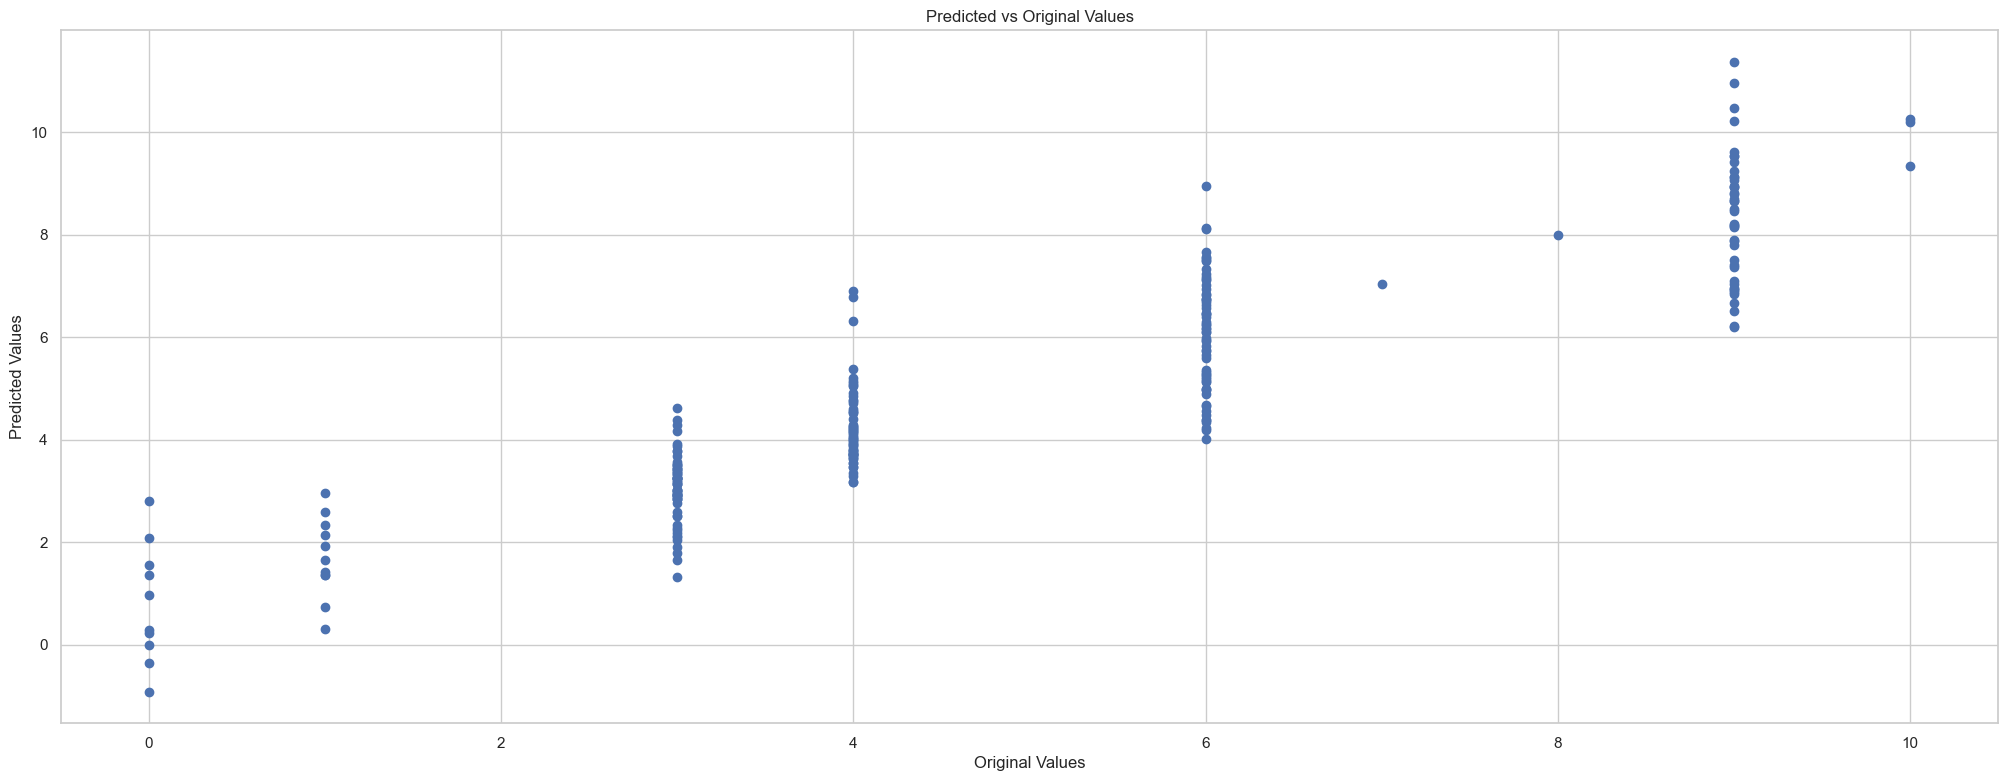

In [ ]:

# Plot predictions vs original values
plt.scatter(y_test.values, predictions)
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Original Values')
plt.show()

#### Calcular lo de la semana

In [ ]:
df_DemPA_Sem=CalDemCar2('SemanaAnalisis')
df_Uni_Sem=ApplyFuncyionValue(df_DemPA_Sem,df_UniCar2_1,df_UniCar2_1T3)
df_Uni_Sem.to_csv(str(sRutaPrint) + '\RecUni.csv')

### Calculo de unidades a partir de la demanda

In [ ]:
# Cálculo de las unidades de acuerdo con la demanda de caribe 2
df_UniAtl_Cal = df_DemCar2Desp.applymap(lambda x: CalcularUnidades(x,df_UniAtl))
df_UniBol_Cal = df_DemCar2Desp.applymap(lambda x: CalcularUnidades(x,df_UniBol))


TypeError: CalcularUnidades() missing 2 required positional arguments: 'df_dataIni' and 'Fecha'

In [ ]:
# Obtener las unidades programadas por el despacho
df_ZAtl=df_Zon[(df_Zon.NombreZona=='ZS_ATLANTICO') & (df_Zon.Tipo=='UN')]
df_ZBol=df_Zon[(df_Zon.NombreZona=='ZS_BOLIVAR') & (df_Zon.Tipo=='UN')]
df_ZCar2=df_Zon[(df_Zon.NombreZona=='ZS_CARIBE2') & (df_Zon.Tipo=='UN')]
df_ZGCM=df_Zon[(df_Zon.NombreZona=='ZS_GCM') & (df_Zon.Tipo=='UN')]


In [ ]:
import holidays

l_holy=[]

for ano in [2023,2024]:
    # Get Colombia holidays for the year 2023
    colombia_holidays = holidays.Colombia(years=ano)

    # Print the holidays
    for date, name in sorted(colombia_holidays.items()):
        #print(f"{date}: {name}")
        l_holy.append(pd.to_datetime(date))


In [ ]:


with pd.ExcelWriter('RevisionZonas.xlsx',engine='xlsxwriter') as writer:

    df_AtlCal.to_excel(writer, sheet_name='AtlCal', index=False)
    df_ZAtl.to_excel(writer, sheet_name='ZonAtlDesp', index=False)
    df_AtlEst.to_excel(writer, sheet_name='AtlEst', index=False)
    df_BolCal.to_excel(writer, sheet_name='BolCal', index=False)
    df_ZBol.to_excel(writer, sheet_name='ZonBolDesp', index=False)
    df_BolEst.to_excel(writer, sheet_name='BolEst', index=False)

    df_ZGCM.to_excel(writer, sheet_name='ZonGCMDesp', index=False)
    df_ZUrra.to_excel(writer, sheet_name='ZonUrrDesp', index=False)
    df_ZCar2.to_excel(writer, sheet_name='ZonCar2Desp', index=False)

    df_Demanda.to_excel(writer, sheet_name='DemCar2Desp', index=False)
    

NameError: name 'df_AtlCal' is not defined